# Summary

**Motion analyses**
* Age and individual explained the most variance in motion (mean FD)
* There are no systematic associations between length of video clip and motion (i.e., there isn't more motion towards the end of long clips)
* Across the sample and whether or not you account for age, sex, and individual, the movies with the least motion were: Bao, One Man Band, Sanjay's Super Team, Mike's New Car, Partysaurus Rex, Zootopia, and Party Central
* Differences in mean motion between clips was minimal (most comparisons not sig)
* In 3-4 year olds, the movies with the least motion were: Zootopia, Small Fry, One Man Band, Partysaurus Rex, La Luna, and Partly Cloudy
* In 5-6 year olds, the movies with the least motion were: Bao, Jack Jack Attack, Sanjay's Super Team, Moana, and Mike's New Car
* In 7-8 year olds, the movies with the least motion were: Inside Out, Party Central, Zootopia, Mike's New Car, Lou, and Boundin'
* Self-contained clips (i.e., shorts) had fewer censored volumes than clips taken from longer movies, however there was no difference in mean FD
* No difference in motion for clips that had speaking or human characters versus no speaking and animal characters respectively

**Affect and Interest analyses**
* Movies with human characters were associated with greater observed negative affect.
* Movies with speaking were associated with lower observed affective intensity.
* No difference in observed interest or positive affect in clips as a function of being self-contained, containing human vs animal characters, or having speaking.
* The video clip with the highest observed interest ratings were: Mike's New Car, The Aeronaut, Partly Cloudy, One Man Band, Inside Out, and Zootopia

**Possible clips to select for imaging based on results + diversity of content**

**Full Sample**: Bao (7.7 min), Mike's New Car (3.75 min), The Aeronaut (3 min)

**3-4 year olds**: Partly Cloudy (5 min), Partysaurus Rex (6.5 min), Small Fry (6.75 min)

**5-6 year olds**: Sanjay's Super Team (7.12 min), Lou (6 min), Jack Jack Attack (4.75 min)

**7-8 year olds**: Inside Out (8 min), Zootopia (5 min), Mike's new Car (3.75 min)

# Analyses

In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scp
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from glob import glob

sns.set(context='talk', style='white')

study_dir = '/Users/catcamacho/Library/CloudStorage/Box-Box/CRAB/CRAB_lab/studies/crab-seal_hbcdmovies_pilot_2025'
data_dir = os.path.join(study_dir, 'DATA','V1_motion_processed')
figs_dir = './figs'
subinfo = pd.read_csv(os.path.join(study_dir,'DATA','redcap_exports','ChildMovieStudy-Basics_DATA_2025-07-15_1335.csv'),index_col=0)
clipinfo = pd.read_csv(os.path.join(study_dir, 'measures','clips','clipinfo.csv'), index_col=0)

subs = sorted(os.listdir(data_dir))
subs.remove('.DS_Store')
subinfo.index = subinfo.index.astype(str)
print('Sample size analyzed: {0}'.format(len(subs)))

Sample size analyzed: 58


### Compile data

In [3]:
data = pd.DataFrame()
i=0
for sub in subs:
    subdata = pd.read_csv(os.path.join(data_dir, sub, '{0}_motion_summary.csv'.format(sub)), index_col=0)
    for movie in subdata.index:
        if np.isfinite(subdata.loc[movie, 'meanFD']):
            data.loc[i, 'sub'] = sub
            try:
                data.loc[i, 'age'] = subinfo.loc[sub, 'child_age_realtime']
                data.loc[i, 'sex'] = subinfo.loc[sub, 'c_gender']-1
            except:
                print(sub)
                pass
            data.loc[i, 'movie'] = movie
            data.loc[i, 'human'] = clipinfo.loc[movie,'humans']
            data.loc[i, 'speaking'] = clipinfo.loc[movie,'speaking']
            data.loc[i, 'contained'] = clipinfo.loc[movie,'contained']
            data.loc[i, 'meanFD'] = subdata.loc[movie, 'meanFD']
            data.loc[i, 'grandmeanFD'] = subdata.loc[:, 'meanFD'].mean()
            if data.loc[i, 'grandmeanFD'] >= 0.6:
                data.loc[i, 'motiongroup'] = 'high'
            else:
                data.loc[i, 'motiongroup'] = 'low'
            data.loc[i, 'pcCens9'] = subdata.loc[movie, 'pcent_volscens_0.9']*100
            data.loc[i, 'pcCens2'] = subdata.loc[movie, 'pcent_volscens_0.2']*100
            try:
                data.loc[i, 'interest'] = subdata.loc[movie, 'interest']
                data.loc[i, 'pos_aff'] = subdata.loc[movie, 'pos_aff']
                data.loc[i, 'neg_aff'] = subdata.loc[movie, 'neg_aff']
                data.loc[i, 'aff_intensity'] = subdata.loc[movie, 'aff_intensity']
            except:
                pass
            i=i+1

data = data.sort_values('movie')
data.describe()

age         sex       human    speaking   contained      meanFD  \
count  304.000000  304.000000  304.000000  304.000000  304.000000  304.000000   
mean     5.588816    0.506579    0.476974    0.611842    0.759868    1.053720   
std      1.723074    0.500781    0.500293    0.488134    0.427868    1.318266   
min      3.000000    0.000000    0.000000    0.000000    0.000000    0.076811   
25%      4.000000    0.000000    0.000000    0.000000    1.000000    0.305315   
50%      5.000000    1.000000    0.000000    1.000000    1.000000    0.525474   
75%      7.000000    1.000000    1.000000    1.000000    1.000000    1.287819   
max      8.000000    1.000000    1.000000    1.000000    1.000000    8.792722   

       grandmeanFD     pcCens9     pcCens2    interest     pos_aff  \
count   304.000000  304.000000  304.000000  289.000000  288.000000   
mean      1.053720   16.909292   44.926021    1.961938    0.944444   
std       0.992929   16.674503   25.074796    1.286389    1.080571   
min       0.087382    0.000000    2.873563    0.000000    0.000000   
25%       0.352355    5.105158   24.929949    1.000000    0.000000   
50%       0.616915   10.275894   39.709833    2.000000    1.000000   
75%       1.451319   23.002103   65.374531    3.000000    2.000000   
max       7.958658   74.983005   99.516519    4.000000    4.000000   

          neg_aff  aff_intensity  
count  289.000000     289.000000  
mean     0.311419       0.958478  
std      0.716793       1.009506  
min      0.000000       0.000000  
25%      0.000000       0.000000  
50%      0.000000       1.000000  
75%      0.000000       1.000000  
max      4.000000       4.000000

### Identify high and low motion kids

0.6478022380386501


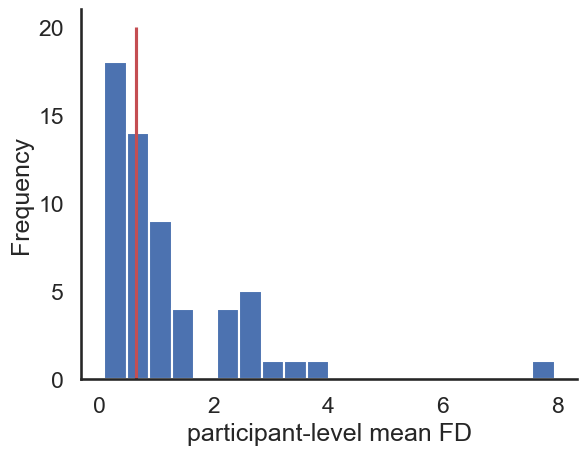

In [4]:
subtempdata = data.loc[:,['sub','age','sex','grandmeanFD']].copy()
subtempdata = subtempdata.drop_duplicates()

subtempdata.loc[:,'grandmeanFD'].plot(kind='hist', bins=20)
plt.vlines(np.nanpercentile(subtempdata.loc[:,'grandmeanFD'].to_numpy(), 50), ymin=0, ymax=20, color='r')
print(np.nanpercentile(subtempdata.loc[:,'grandmeanFD'].to_numpy(), 50))
sns.despine()
plt.xlabel('participant-level mean FD')
plt.show()
plt.close()

### mixed effects models examining age, individual, and sex predicting motion

The below cell has results from a mixed effect model predicting FD from age and sex, modeling each participant as a random intercept. Individual participant and age are the strongest predictors of FD.

In [6]:
res = smf.mixedlm('meanFD ~ age + sex', groups='sub', data=data).fit()
data.loc[:, 'meanFD_res'] = res.resid
print(res.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: meanFD   
No. Observations: 304     Method:             REML     
No. Groups:       58      Scale:              0.9673   
Min. group size:  1       Log-Likelihood:     -472.5120
Max. group size:  6       Converged:          Yes      
Mean group size:  5.2                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     2.912    0.444  6.559 0.000  2.042  3.783
age          -0.313    0.072 -4.363 0.000 -0.454 -0.172
sex          -0.114    0.246 -0.465 0.642 -0.597  0.368
sub Var       0.680    0.217                           



## Motion analysis  and plots
Notes
* meanFD = average FD across the movie
* pcCens9 = pecent censored if the FD threshold is 0.9mm FD
* pcCens2 = pecent censored if the FD threshold is 0.2mm FD

### Full Sample

In [52]:
# rank means = resid FD
means = pd.DataFrame()
for m in np.unique(data.loc[:,'movie']):
    means.loc[m, 'FD'] = data.loc[data['movie']==m,'meanFD_res'].mean()
means = means.sort_values('FD',ascending=True)

# t-tests
results = pd.DataFrame()
i=1
m1 = means.index[0]
for a in range(1,len(means.index)):
    m2 = means.index[a]
    t, p = scp.ttest_ind(data.loc[data['movie']==m1,'meanFD_res'], 
                         data.loc[data['movie']==m2,'meanFD_res'])
    results.loc[i, 'movie1'] = m1
    results.loc[i, 'movie2'] = m2
    results.loc[i, 'movie1_mean'] = means.loc[m1,'FD']
    results.loc[i, 'movie2_mean'] = means.loc[m2,'FD']
    results.loc[i, 't'] = t
    results.loc[i, 'p'] = p
    i += 1
results = results.sort_values('t', ascending=False)
results

movie1              movie2  movie1_mean  movie2_mean         t         p
1     bao        one_man_band    -0.255636    -0.246608 -0.067869  0.946503
2     bao  sanjays_super_team    -0.255636    -0.204095 -0.305916  0.762421
4     bao       mikes_new_car    -0.255636    -0.176484 -0.322765  0.749454
3     bao     partysaurus_rex    -0.255636    -0.182840 -0.418885  0.679362
5     bao            zootopia    -0.255636    -0.149411 -0.442505  0.661784
6     bao       party_central    -0.255636    -0.110131 -0.703524  0.487982
9     bao             boundin    -0.255636    -0.001235 -0.712765  0.482591
8     bao       despicable_me    -0.255636    -0.072253 -0.734367  0.469558
15    bao                 lou    -0.255636     0.116167 -0.792522  0.435821
12    bao           air_mater    -0.255636     0.032059 -0.835974  0.410787
11    bao       partly_cloudy    -0.255636     0.027312 -0.883037  0.385308
7     bao           small_fry    -0.255636    -0.082670 -0.899839  0.378409
10    bao               bluey    -0.255636    -0.000346 -0.923023  0.364818
20    bao     jackjack_attack    -0.255636     0.210070 -0.929604  0.362665
14    bao               birds    -0.255636     0.088708 -0.976497  0.338559
18    bao          inside_out    -0.255636     0.180732 -1.215274  0.235182
19    bao               moana    -0.255636     0.192792 -1.296205  0.207761
21    bao             la_luna    -0.255636     0.232871 -1.973270  0.061158
13    bao            aeronaut    -0.255636     0.086424 -2.029295  0.054155
17    bao               piper    -0.255636     0.173406 -2.296399  0.031548
16    bao              frozen    -0.255636     0.163975 -2.766076  0.010993

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


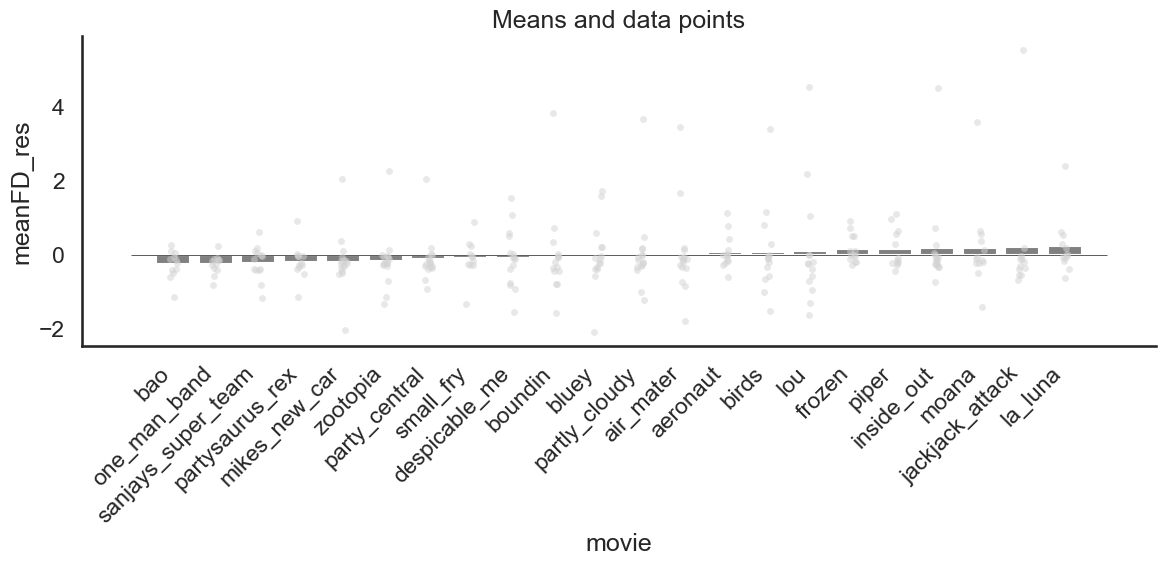

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(y='meanFD_res',x='movie', data=data, color='gray',errwidth=0, order=means.index)
sns.stripplot(y='meanFD_res',x='movie', data=data, color='lightgray', alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.hlines(y=0,xmin=-1,xmax=22, color='k', lw=0.5)
plt.xlim=(-1,22)
sns.despine()
plt.legend().remove()
plt.title('Means and data points')
plt.tight_layout()
plt.savefig(os.path.join(figs_dir, 'fullsample_clip_motion_resFD_plot.png'), dpi=200)
plt.show()
plt.close()

In [50]:
# rank means = raw FD
means = pd.DataFrame()
for m in np.unique(data.loc[:,'movie']):
    means.loc[m, 'FD'] = data.loc[data['movie']==m,'meanFD'].mean()
means = means.sort_values('FD',ascending=True)

# t-tests
results = pd.DataFrame()
i=1
m1 = means.index[0]
for a in range(1,len(means.index)):
    m2 = means.index[a]
    t, p = scp.ttest_ind(data.loc[data['movie']==m1,'meanFD'], 
                         data.loc[data['movie']==m2,'meanFD'])
    results.loc[i, 'movie1'] = m1
    results.loc[i, 'movie2'] = m2
    results.loc[i, 'movie1_mean'] = means.loc[m1,'FD']
    results.loc[i, 'movie2_mean'] = means.loc[m2,'FD']
    results.loc[i, 't'] = t
    results.loc[i, 'p'] = p
    i += 1
results = results.sort_values('t', ascending=False)
results

movie1              movie2  movie1_mean  movie2_mean         t         p
2     bao       mikes_new_car     0.741969     0.811590 -0.184723  0.854879
1     bao  sanjays_super_team     0.741969     0.808124 -0.222748  0.825698
4     bao            zootopia     0.741969     0.838662 -0.250169  0.804423
3     bao        one_man_band     0.741969     0.822398 -0.261068  0.796469
5     bao       party_central     0.741969     0.877943 -0.366125  0.717234
6     bao     partysaurus_rex     0.741969     0.886167 -0.463597  0.647490
7     bao           small_fry     0.741969     0.906816 -0.497110  0.624276
9     bao           air_mater     0.741969     1.020133 -0.620676  0.540216
17    bao     jackjack_attack     0.741969     1.207674 -0.638337  0.529844
8     bao       partly_cloudy     0.741969     1.015386 -0.708560  0.484902
14    bao          inside_out     0.741969     1.168805 -0.774679  0.445518
10    bao             la_luna     0.741969     1.057645 -0.820991  0.420459
16    bao             boundin     0.741969     1.207459 -0.858829  0.398595
20    bao                 lou     0.741969     1.325684 -0.923278  0.365052
12    bao               piper     0.741969     1.135687 -0.991768  0.332094
11    bao            aeronaut     0.741969     1.124202 -1.057300  0.301354
19    bao               birds     0.741969     1.212712 -1.097244  0.283422
21    bao               moana     0.741969     1.450232 -1.121942  0.273464
13    bao       despicable_me     0.741969     1.136440 -1.155464  0.258825
18    bao               bluey     0.741969     1.208347 -1.156635  0.258355
15    bao              frozen     0.741969     1.201753 -1.457068  0.158616

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


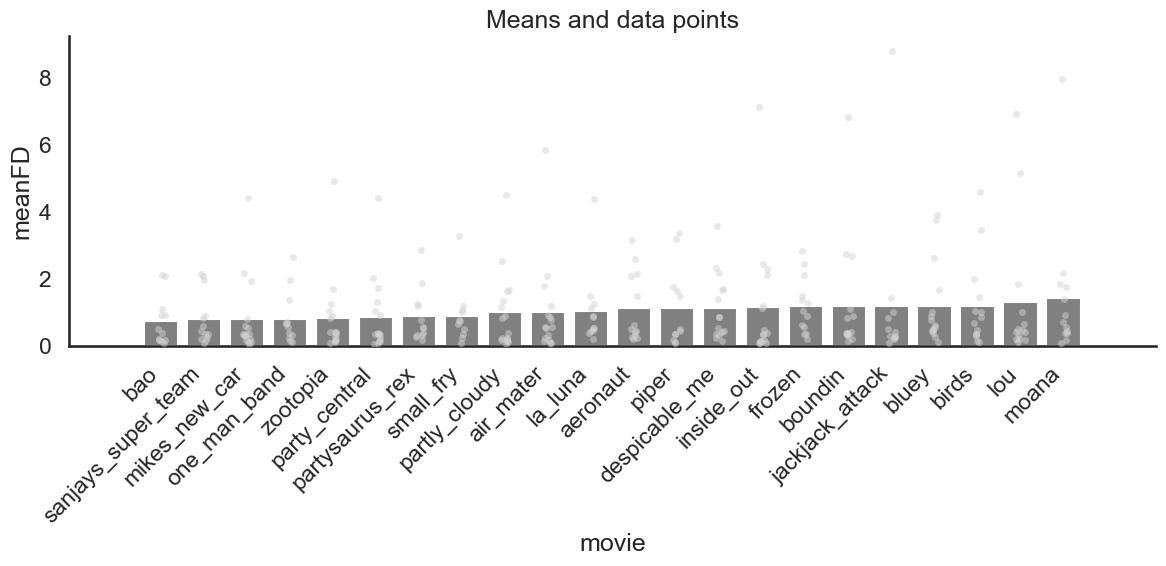

In [51]:
plt.figure(figsize=(12,6))
sns.barplot(y='meanFD',x='movie', data=data, color='gray',errwidth=0, order=means.index)
sns.stripplot(y='meanFD',x='movie', data=data, color='lightgray', alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.hlines(y=0,xmin=-1,xmax=22, color='k', lw=0.5)
plt.xlim=(-1,22)
sns.despine()
plt.legend().remove()
plt.title('Means and data points')
plt.tight_layout()
plt.savefig(os.path.join(figs_dir, 'fullsample_clip_motion_FD_plot.png'), dpi=200)
plt.show()
plt.close()

### 3 and 4 YOs

In [47]:
# 3 & 4 YOs rank means = raw FD
age34 = data.loc[data['age']<5,:]
means = pd.DataFrame()
for m in np.unique(age34.loc[:,'movie']):
    means.loc[m, 'FD'] = age34.loc[data['movie']==m,'meanFD'].mean()
means = means.sort_values('FD',ascending=True)

# t-tests
results = pd.DataFrame()
i=1
m1 = means.index[0]
for a in range(1,len(means.index)):
    m2 = means.index[a]
    t, p = scp.ttest_ind(age34.loc[age34['movie']==m1,'meanFD'], 
                         age34.loc[age34['movie']==m2,'meanFD'])
    results.loc[i, 'movie1'] = m1
    results.loc[i, 'movie2'] = m2
    results.loc[i, 'movie1_mean'] = means.loc[m1,'FD']
    results.loc[i, 'movie2_mean'] = means.loc[m2,'FD']
    results.loc[i, 't'] = t
    results.loc[i, 'p'] = p
    i += 1
results = results.sort_values('t', ascending=False)
results

movie1              movie2  movie1_mean  movie2_mean         t         p
1   zootopia           small_fry     0.807586     0.808666 -0.004730  0.996358
2   zootopia        one_man_band     0.807586     0.900212 -0.249693  0.809994
3   zootopia     partysaurus_rex     0.807586     1.070005 -0.779945  0.460976
13  zootopia                 lou     0.807586     1.555496 -0.807971  0.442467
5   zootopia       partly_cloudy     0.807586     1.206898 -0.869875  0.409709
18  zootopia           air_mater     0.807586     1.725794 -0.877902  0.405590
10  zootopia               bluey     0.807586     1.417976 -0.932396  0.378413
14  zootopia       mikes_new_car     0.807586     1.599196 -0.985509  0.353238
6   zootopia          inside_out     0.807586     1.288872 -1.022127  0.336632
15  zootopia       party_central     0.807586     1.621588 -1.041634  0.328034
4   zootopia             la_luna     0.807586     1.095278 -1.075505  0.323483
11  zootopia               piper     0.807586     1.464491 -1.077098  0.317150
19  zootopia             boundin     0.807586     2.237421 -1.161521  0.278911
21  zootopia     jackjack_attack     0.807586     3.318673 -1.246408  0.259070
9   zootopia              frozen     0.807586     1.408945 -1.263536  0.246849
8   zootopia  sanjays_super_team     0.807586     1.362593 -1.274841  0.243048
12  zootopia            aeronaut     0.807586     1.473612 -1.329888  0.225251
7   zootopia                 bao     0.807586     1.328105 -1.408554  0.208620
16  zootopia               birds     0.807586     1.625134 -1.452941  0.184310
20  zootopia               moana     0.807586     3.094427 -1.547774  0.165603
17  zootopia       despicable_me     0.807586     1.691598 -2.804283  0.023045

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


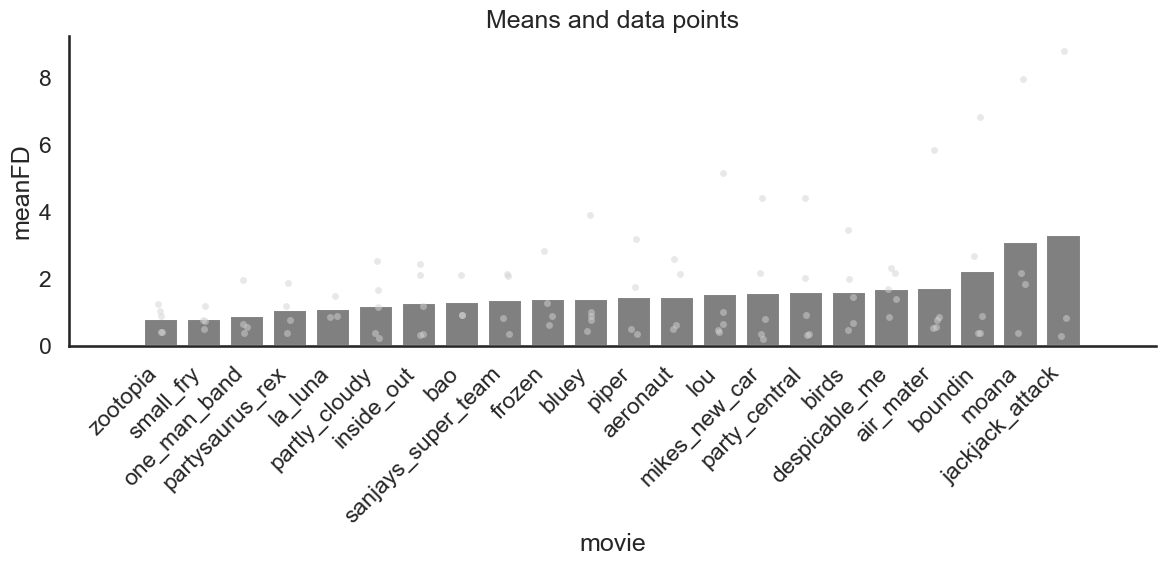

In [48]:
plt.figure(figsize=(12,6))
sns.barplot(y='meanFD',x='movie', data=age34, color='gray',errwidth=0, order=means.index)
sns.stripplot(y='meanFD',x='movie', data=age34, color='lightgray', alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.hlines(y=0,xmin=-1,xmax=22, color='k', lw=0.5)
plt.xlim=(-1,22)
sns.despine()
plt.legend().remove()
plt.title('Means and data points')
plt.tight_layout()
plt.savefig(os.path.join(figs_dir, 'age34_clip_motion_FD_plot.png'), dpi=200)
plt.show()
plt.close()

### 5 and 6 YOs

In [43]:
# 5 & 6 YO; rank means = raw FD
age56 = data.loc[(data['age']==5) | (data['age']==6),:]
means = pd.DataFrame()
for m in np.unique(age56.loc[:,'movie']):
    means.loc[m, 'FD'] = age56.loc[data['movie']==m,'meanFD'].mean()
means = means.sort_values('FD',ascending=True)

# t-tests
results = pd.DataFrame()
i=1
m1 = means.index[0]
for a in range(1,len(means.index)):
    m2 = means.index[a]
    t, p = scp.ttest_ind(age56.loc[age56['movie']==m1,'meanFD'], 
                         age56.loc[age56['movie']==m2,'meanFD'])
    results.loc[i, 'movie1'] = m1
    results.loc[i, 'movie2'] = m2
    results.loc[i, 'movie1_mean'] = means.loc[m1,'FD']
    results.loc[i, 'movie2_mean'] = means.loc[m2,'FD']
    results.loc[i, 't'] = t
    results.loc[i, 'p'] = p
    i += 1
results = results.sort_values('t', ascending=False)
results

movie1              movie2  movie1_mean  movie2_mean         t         p
1     bao     jackjack_attack     0.323189     0.325398 -0.021100  0.983850
2     bao  sanjays_super_team     0.323189     0.388449 -0.346794  0.740585
4     bao       mikes_new_car     0.323189     0.662666 -1.008923  0.342550
20    bao                 lou     0.323189     1.967750 -1.135184  0.293668
19    bao          inside_out     0.323189     1.938415 -1.187791  0.268982
12    bao            zootopia     0.323189     1.429667 -1.213038  0.259715
10    bao             boundin     0.323189     1.091928 -1.525818  0.170887
11    bao       despicable_me     0.323189     1.399907 -1.602303  0.153123
6     bao           air_mater     0.323189     0.844120 -1.703699  0.126841
9     bao       party_central     0.323189     0.866915 -1.768017  0.115033
7     bao       partly_cloudy     0.323189     0.856183 -1.778220  0.113258
3     bao               moana     0.323189     0.526817 -1.899796  0.106200
5     bao               birds     0.323189     0.778099 -2.040235  0.087416
17    bao               bluey     0.323189     1.807590 -2.074517  0.076704
18    bao               piper     0.323189     1.829210 -2.112792  0.088309
14    bao     partysaurus_rex     0.323189     1.559052 -2.152848  0.083942
16    bao            aeronaut     0.323189     1.804645 -2.572161  0.042212
21    bao           small_fry     0.323189     2.157586 -2.597047  0.060235
15    bao        one_man_band     0.323189     1.581044 -2.611193  0.047601
8     bao             la_luna     0.323189     0.866842 -2.652666  0.037893
13    bao              frozen     0.323189     1.549937 -2.702955  0.035436

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


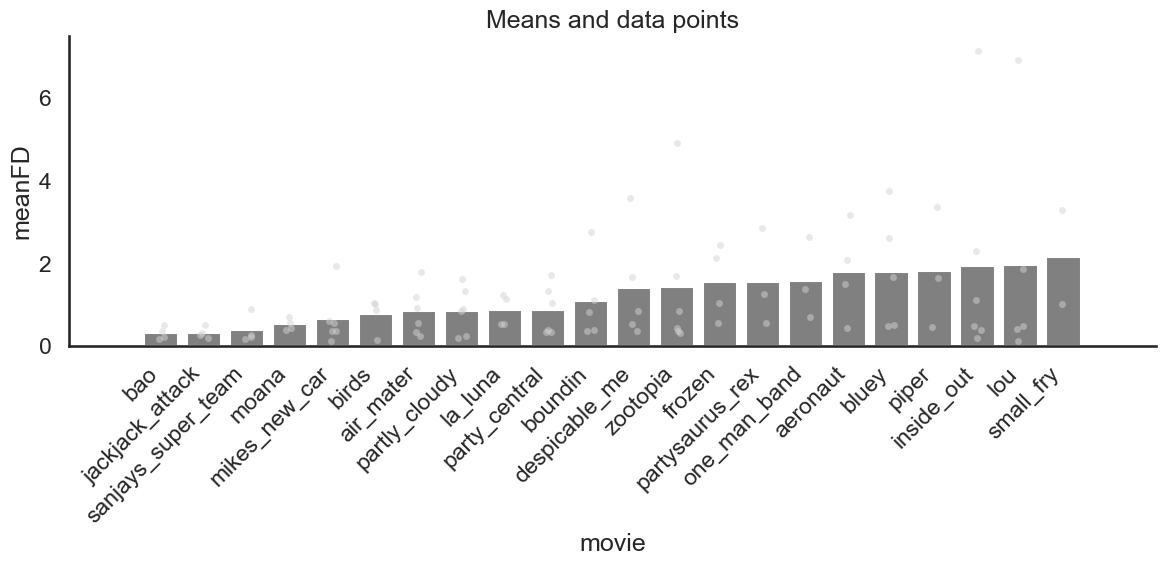

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(y='meanFD',x='movie', data=age56, color='gray',errwidth=0, order=means.index)
sns.stripplot(y='meanFD',x='movie', data=age56, color='lightgray', alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.hlines(y=0,xmin=-1,xmax=22, color='k', lw=0.5)
plt.xlim=(-1,22)
sns.despine()
plt.legend().remove()
plt.title('Means and data points')
plt.tight_layout()
plt.savefig(os.path.join(figs_dir, 'age56_clip_motion_FD_plot.png'), dpi=200)
plt.show()
plt.close()

### 7 & 8 YO

In [58]:
# rank means = raw FD
age78 = data.loc[(data['age']==7) | (data['age']==8),:]
means = pd.DataFrame()
for m in np.unique(age78.loc[:,'movie']):
    means.loc[m, 'FD'] = age78.loc[data['movie']==m,'meanFD'].mean()
means = means.sort_values('FD',ascending=True)

# t-tests
results = pd.DataFrame()
i=1
m1 = means.index[0]
for a in range(1,len(means.index)):
    m2 = means.index[a]
    t, p = scp.ttest_ind(age78.loc[age78['movie']==m1,'meanFD'], 
                         age78.loc[age78['movie']==m2,'meanFD'])
    results.loc[i, 'movie1'] = m1
    results.loc[i, 'movie2'] = m2
    results.loc[i, 't'] = t
    results.loc[i, 'p'] = p
    i += 1
results = results.sort_values('t', ascending=False)
results

movie1              movie2         t         p
1   inside_out       party_central -0.655491  0.530546
13  inside_out           air_mater -1.011954  0.341184
19  inside_out       partly_cloudy -1.021660  0.336840
20  inside_out               birds -1.185622  0.269791
11  inside_out               piper -1.263339  0.242040
21  inside_out             la_luna -1.324637  0.221879
2   inside_out            zootopia -1.337776  0.217749
3   inside_out       mikes_new_car -1.483066  0.176345
16  inside_out                 bao -1.553146  0.158992
15  inside_out  sanjays_super_team -1.738172  0.120378
7   inside_out        one_man_band -1.776355  0.113580
14  inside_out     jackjack_attack -2.042229  0.075413
12  inside_out           small_fry -2.044130  0.075190
17  inside_out              frozen -2.273011  0.052642
18  inside_out               moana -2.305121  0.050069
10  inside_out               bluey -2.966992  0.017953
4   inside_out                 lou -3.167350  0.015766
8   inside_out       despicable_me -3.251224  0.011680
5   inside_out             boundin -3.377686  0.009675
9   inside_out     partysaurus_rex -3.552152  0.007486
6   inside_out            aeronaut -4.108136  0.003399

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


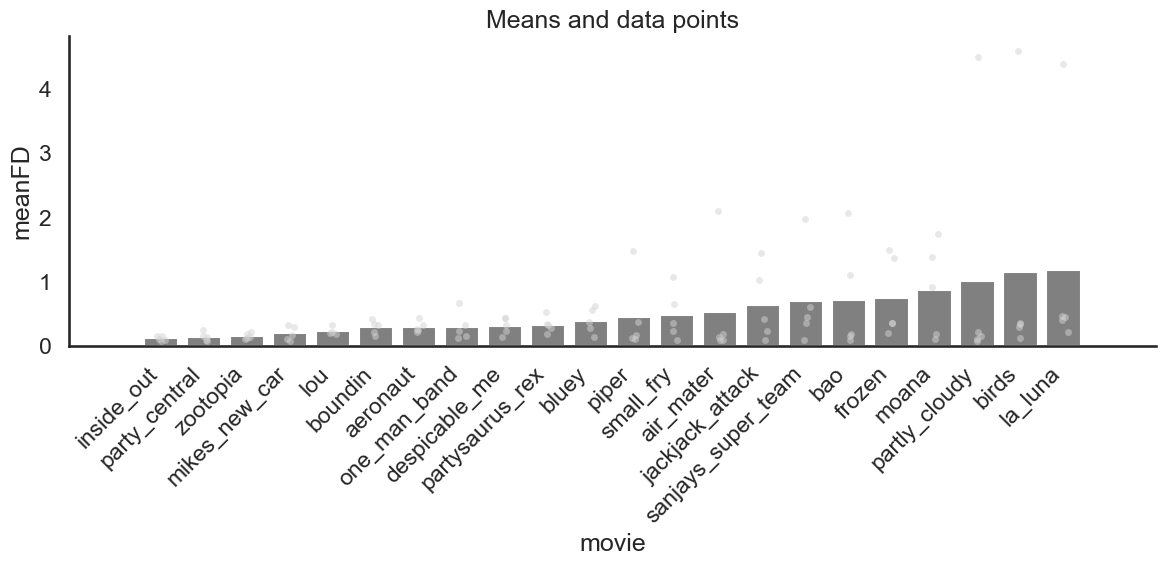

In [59]:
plt.figure(figsize=(12,6))
sns.barplot(y='meanFD',x='movie', data=age78, color='gray',errwidth=0, order=means.index)
sns.stripplot(y='meanFD',x='movie', data=age78, color='lightgray', alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.hlines(y=0,xmin=-1,xmax=22, color='k', lw=0.5)
plt.xlim=(-1,22)
sns.despine()
plt.legend().remove()
plt.title('Means and data points')
plt.tight_layout()
plt.savefig(os.path.join(figs_dir, 'age78_clip_motion_FD_plot.png'), dpi=200)
plt.show()
plt.close()

### raw data plots - high motion only

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


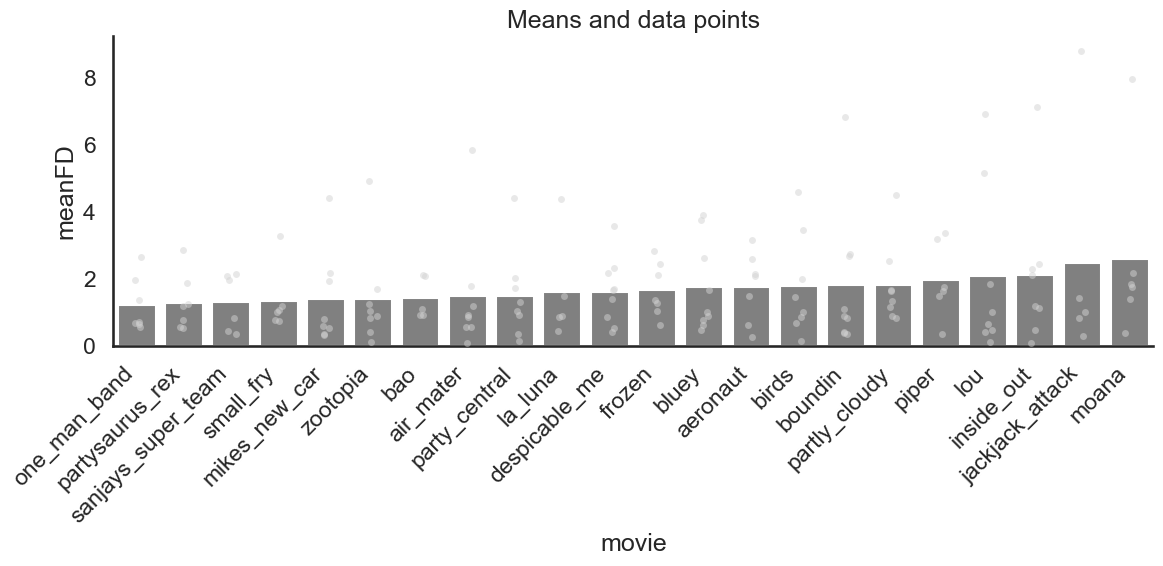

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


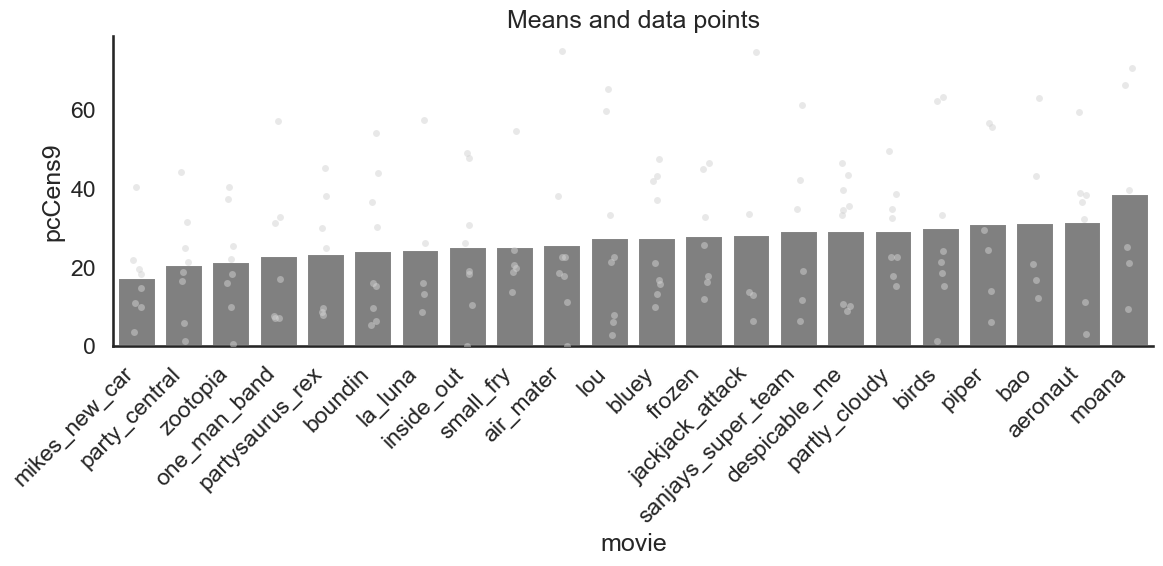

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


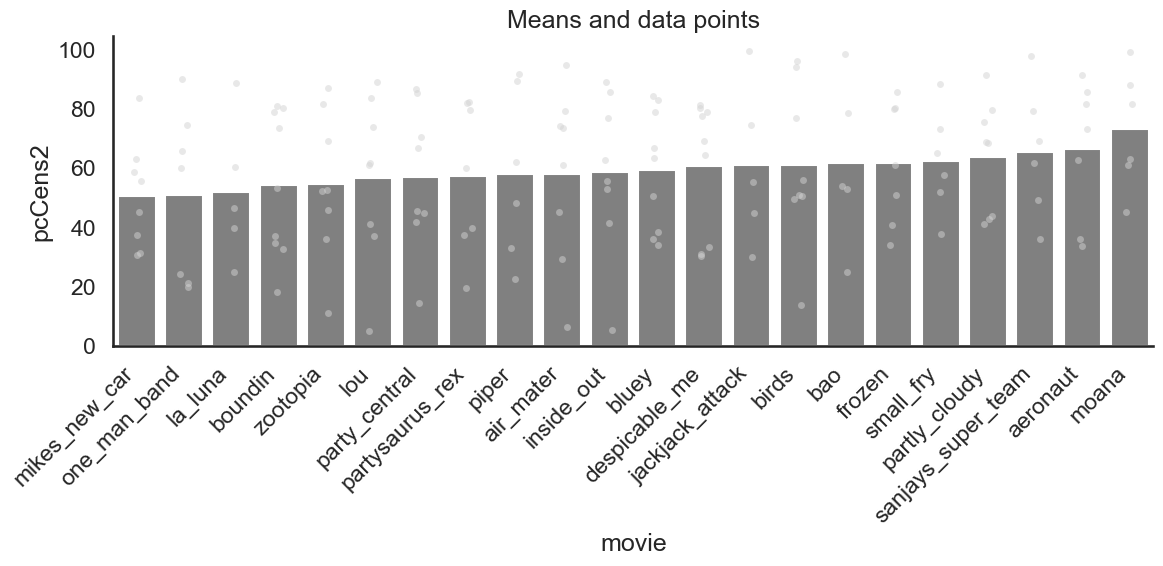

In [65]:
# plot mean FD and proportion of data censored at each 0.9 and 0.2 mm FD

for v in ['meanFD','pcCens9','pcCens2']:

    means = pd.DataFrame()
    for m in np.unique(data.loc[:,'movie']):
        means.loc[m, v] = data.loc[(data['movie']==m) & (data['motiongroup']=='high'), v].mean()
    means = means.sort_values(v,ascending=True)

    plt.figure(figsize=(12,6))
    sns.barplot(y=v,x='movie', data=data.loc[data['motiongroup']=='high',:], color='gray',errwidth=0, order=means.index)
    sns.stripplot(y=v,x='movie', data=data.loc[data['motiongroup']=='high',:], color='lightgray', alpha=0.5)
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.title('Means and data points')
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'highmotion_clip_motion_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

### raw data plots - full sample

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


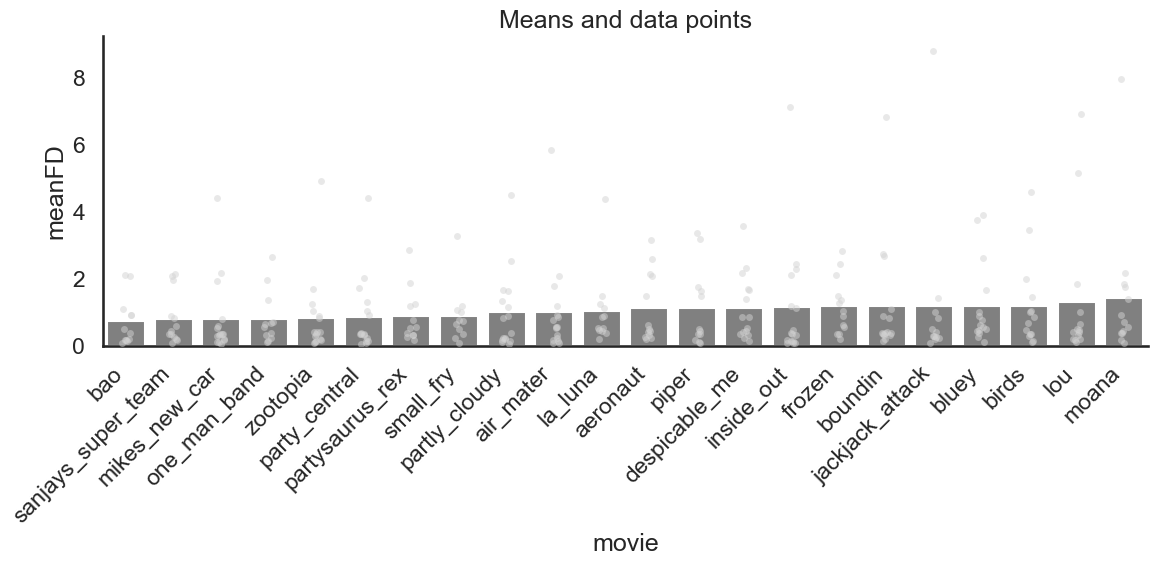

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


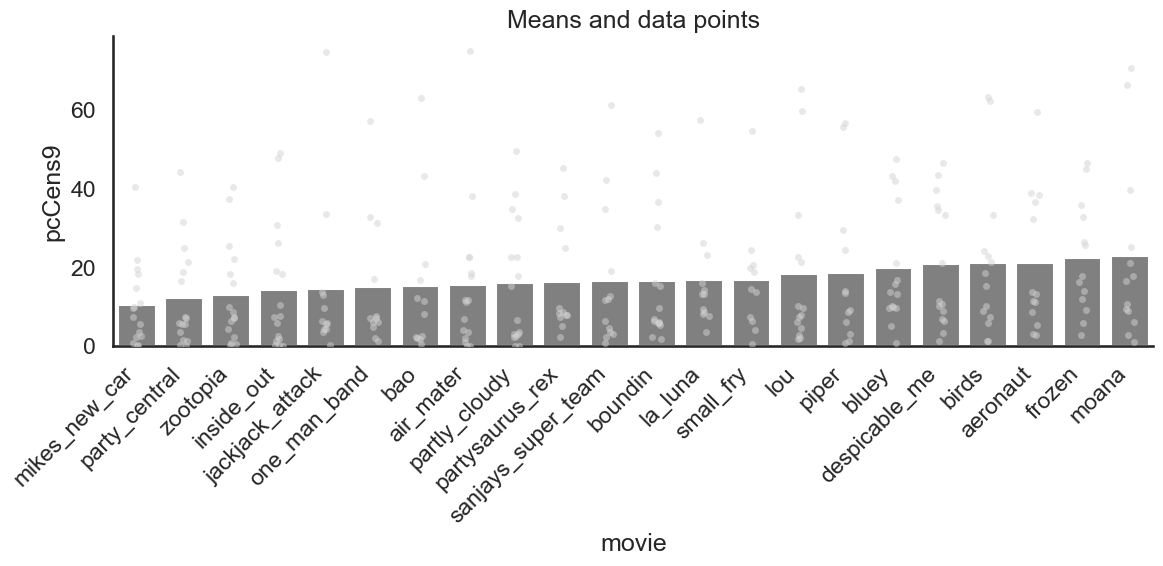

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


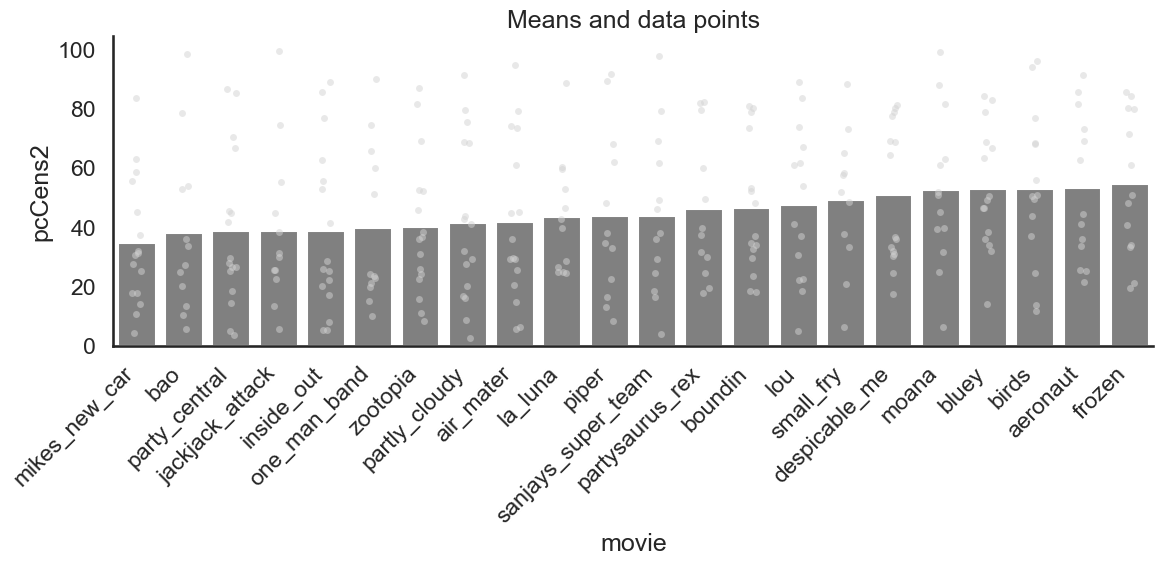

In [66]:
# plot mean FD and proportion of data censored at each 0.9 and 0.2 mm FD

for v in ['meanFD','pcCens9','pcCens2']:
    means = pd.DataFrame()
    for m in np.unique(data.loc[:,'movie']):
        means.loc[m, v] = data.loc[(data['movie']==m), v].mean()
    means = means.sort_values(v,ascending=True)
    
    plt.figure(figsize=(12,6))
    sns.barplot(y=v,x='movie', data=data, color='gray',errwidth=0, order=means.index)
    sns.stripplot(y=v,x='movie', data=data, color='lightgray',alpha=0.5)
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.title('Means and data points')
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_clip_motion_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

### analyses of clip category - full sample


################### meanFD - human ###################

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: meanFD   
No. Observations: 288     Method:             REML     
No. Groups:       55      Scale:              0.8530   
Min. group size:  2       Log-Likelihood:     -426.3926
Max. group size:  6       Converged:          Yes      
Mean group size:  5.2                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     2.594    0.401  6.472 0.000  1.809  3.380
human         0.061    0.128  0.475 0.635 -0.191  0.313
age          -0.262    0.065 -4.063 0.000 -0.389 -0.136
sex          -0.253    0.219 -1.155 0.248 -0.683  0.176
sub Var       0.488    0.155                           



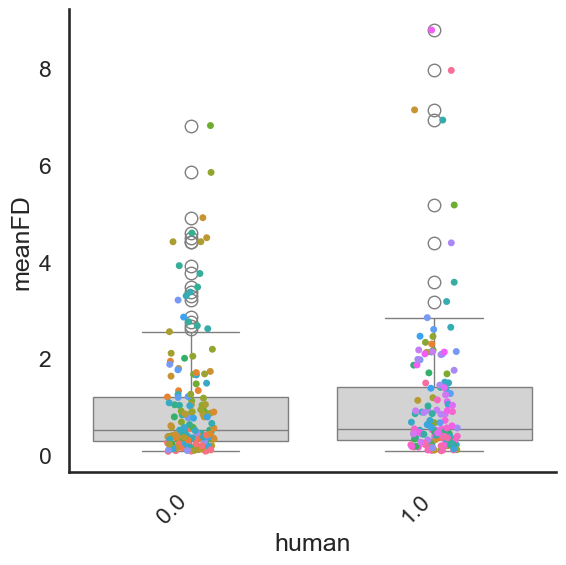


################### meanFD - speaking ###################

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: meanFD   
No. Observations: 288     Method:             REML     
No. Groups:       55      Scale:              0.8543   
Min. group size:  2       Log-Likelihood:     -426.5860
Max. group size:  6       Converged:          Yes      
Mean group size:  5.2                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     2.608    0.404  6.459 0.000  1.817  3.399
speaking      0.020    0.117  0.169 0.866 -0.209  0.249
age          -0.261    0.064 -4.056 0.000 -0.387 -0.135
sex          -0.255    0.219 -1.164 0.244 -0.684  0.174
sub Var       0.486    0.155                           



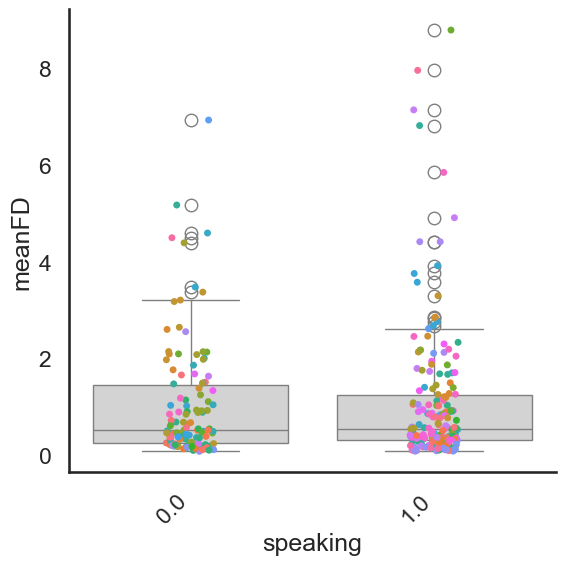


################### meanFD - contained ###################

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: meanFD   
No. Observations: 288     Method:             REML     
No. Groups:       55      Scale:              0.8518   
Min. group size:  2       Log-Likelihood:     -426.1876
Max. group size:  6       Converged:          Yes      
Mean group size:  5.2                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     2.693    0.407  6.609 0.000  1.894  3.491
contained    -0.101    0.131 -0.771 0.441 -0.358  0.156
age          -0.260    0.064 -4.039 0.000 -0.387 -0.134
sex          -0.252    0.219 -1.151 0.250 -0.682  0.177
sub Var       0.488    0.155                           



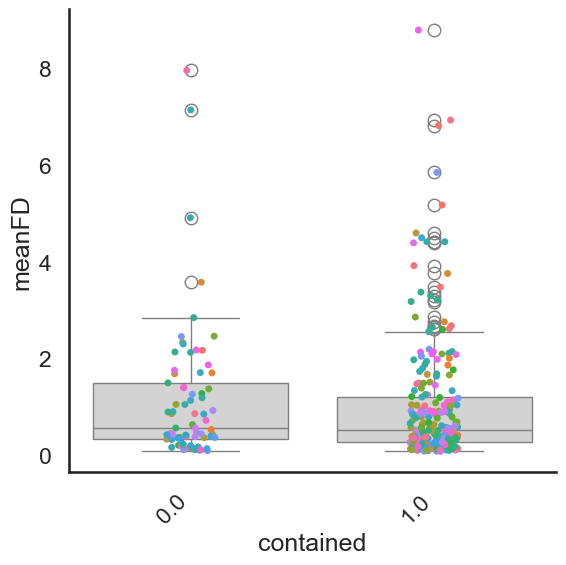


################### pcCens9 - human ###################

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens9   
No. Observations: 288     Method:             REML      
No. Groups:       55      Scale:              79.3716   
Min. group size:  2       Log-Likelihood:     -1092.8313
Max. group size:  6       Converged:          Yes       
Mean group size:  5.2                                   
--------------------------------------------------------
             Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
--------------------------------------------------------
Intercept    45.192    5.976  7.562 0.000  33.479 56.905
human         1.315    1.292  1.018 0.309  -1.217  3.847
age          -4.542    0.967 -4.699 0.000  -6.437 -2.648
sex          -6.539    3.279 -1.994 0.046 -12.967 -0.112
sub Var     131.143    3.609                            



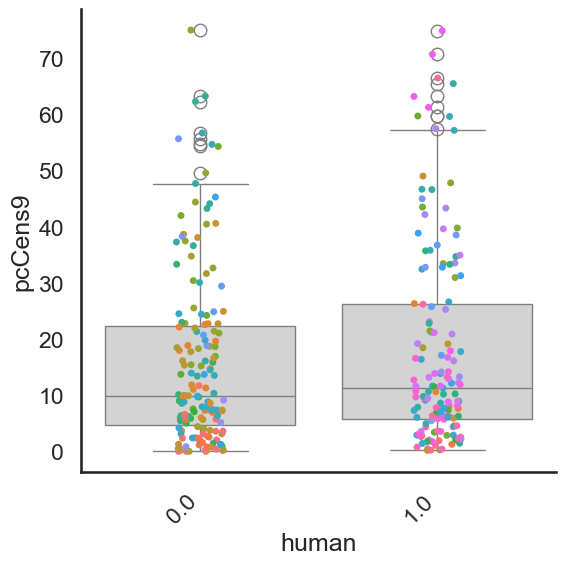


################### pcCens9 - speaking ###################

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens9   
No. Observations: 288     Method:             REML      
No. Groups:       55      Scale:              79.5781   
Min. group size:  2       Log-Likelihood:     -1093.2850
Max. group size:  6       Converged:          Yes       
Mean group size:  5.2                                   
--------------------------------------------------------
             Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
--------------------------------------------------------
Intercept    46.247    5.998  7.711 0.000  34.492 58.002
speaking     -0.704    1.139 -0.619 0.536  -2.936  1.527
age          -4.536    0.967 -4.690 0.000  -6.432 -2.641
sex          -6.567    3.281 -2.002 0.045 -12.997 -0.137
sub Var     131.241    3.608                            



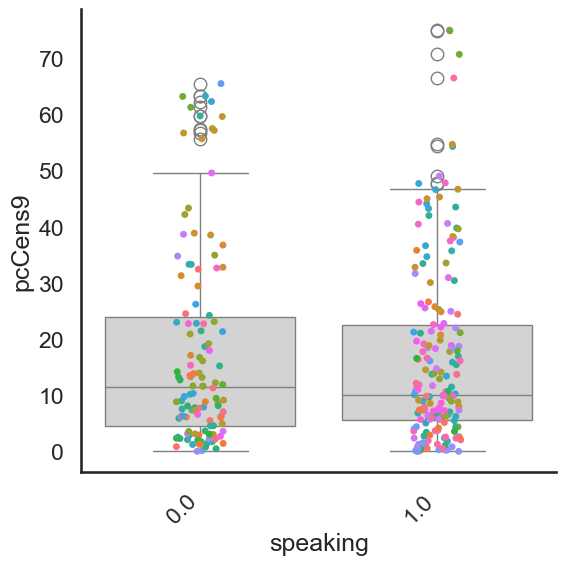


################### pcCens9 - contained ###################

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens9   
No. Observations: 288     Method:             REML      
No. Groups:       55      Scale:              78.1387   
Min. group size:  2       Log-Likelihood:     -1091.3105
Max. group size:  6       Converged:          Yes       
Mean group size:  5.2                                   
--------------------------------------------------------
             Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
--------------------------------------------------------
Intercept    47.594    6.045  7.873 0.000  35.745 59.442
contained    -2.565    1.258 -2.039 0.041  -5.030 -0.099
age          -4.503    0.972 -4.633 0.000  -6.408 -2.598
sex          -6.507    3.297 -1.974 0.048 -12.969 -0.046
sub Var     132.961    3.677                            



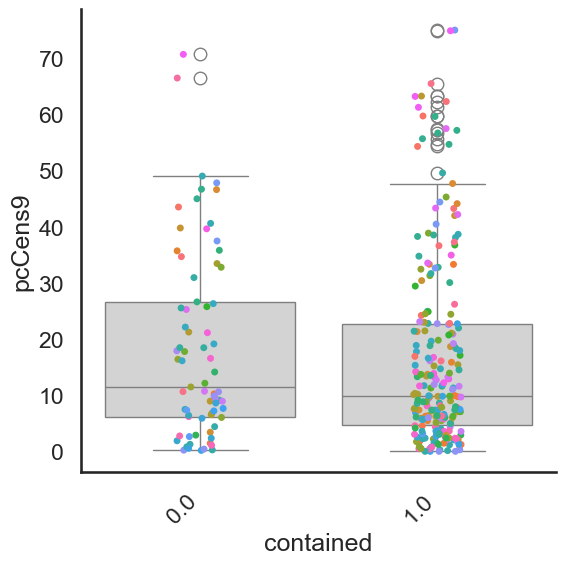


################### pcCens2 - human ###################

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens2   
No. Observations: 288     Method:             REML      
No. Groups:       55      Scale:              149.7694  
Min. group size:  2       Log-Likelihood:     -1185.3880
Max. group size:  6       Converged:          Yes       
Mean group size:  5.2                                   
--------------------------------------------------------
            Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept   95.145    8.594 11.071 0.000  78.300 111.989
human        0.547    1.780  0.308 0.758  -2.941   4.035
age         -8.281    1.391 -5.954 0.000 -11.007  -5.555
sex         -6.917    4.717 -1.466 0.143 -16.162   2.328
sub Var    274.239    5.407                             



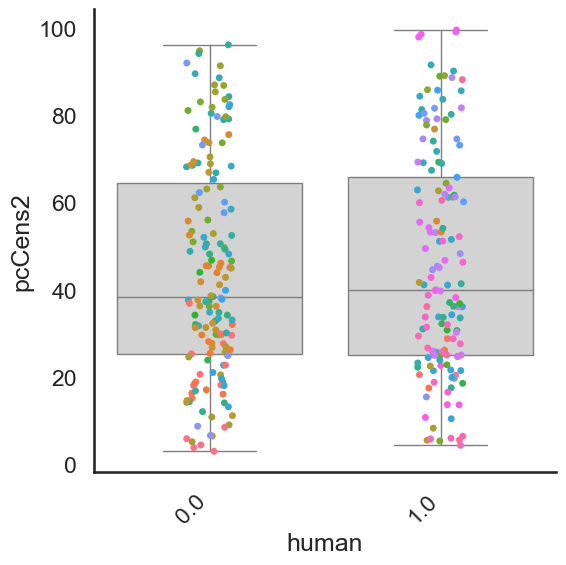


################### pcCens2 - speaking ###################

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens2   
No. Observations: 288     Method:             REML      
No. Groups:       55      Scale:              149.4209  
Min. group size:  2       Log-Likelihood:     -1185.3409
Max. group size:  6       Converged:          Yes       
Mean group size:  5.2                                   
--------------------------------------------------------
            Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept   94.702    8.634 10.969 0.000  77.780 111.624
speaking     1.046    1.561  0.670 0.503  -2.014   4.107
age         -8.263    1.393 -5.931 0.000 -10.994  -5.533
sex         -6.944    4.725 -1.469 0.142 -16.205   2.318
sub Var    275.405    5.434                             



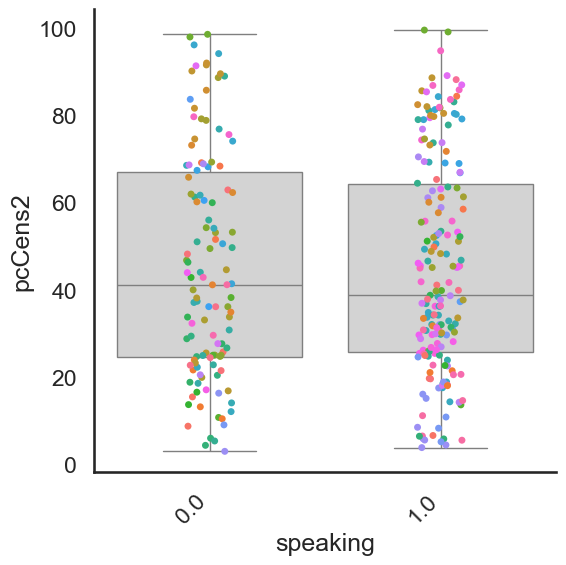


################### pcCens2 - contained ###################

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pcCens2   
No. Observations: 288     Method:             REML      
No. Groups:       55      Scale:              145.8678  
Min. group size:  2       Log-Likelihood:     -1182.5611
Max. group size:  6       Converged:          Yes       
Mean group size:  5.2                                   
--------------------------------------------------------
            Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept   98.328    8.678 11.331 0.000  81.319 115.336
contained   -4.166    1.719 -2.424 0.015  -7.535  -0.797
age         -8.233    1.397 -5.895 0.000 -10.970  -5.496
sex         -6.822    4.736 -1.440 0.150 -16.105   2.462
sub Var    277.532    5.525                             



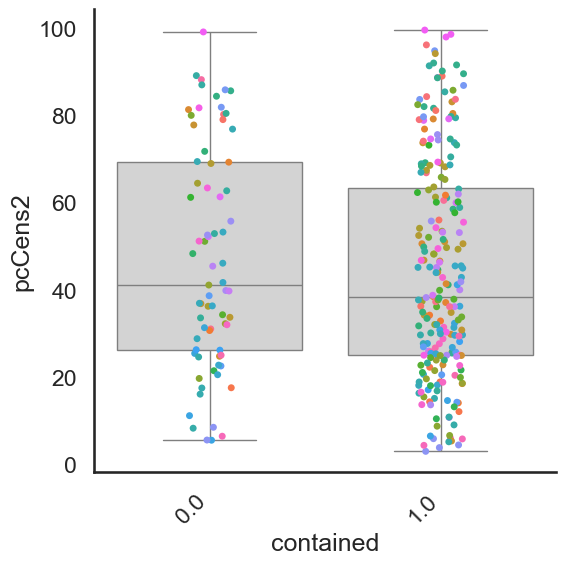

In [67]:
for v in ['meanFD','pcCens9','pcCens2']:
    for f in ['human','speaking','contained']:

        print('')
        print('################### {0} - {1} ###################'.format(v, f))
        print('')

        temp = data.dropna().copy()
        res = smf.mixedlm('{0} ~ {1} + age + sex'.format(v,f), groups='sub', data=temp).fit()
        print(res.summary())
        
        plt.figure(figsize=(6,6))
        sns.boxplot(y=v,x=f, data=data, color='lightgray')
        sns.stripplot(y=v,x=f, data=data, hue='sub')
        plt.xticks(rotation=45, ha='right')
        sns.despine()
        plt.legend().remove()
        plt.tight_layout()
        plt.savefig(os.path.join(figs_dir, 'fullsample_feature_{0}_motion_{1}_plot.png'.format(f,v)), dpi=200)
        plt.show()
        plt.close()
        
        

# get timeseries of motion across clips

In [68]:
clipmotion = {}
for mov in clipinfo.index:
    clipmotion[mov] = pd.DataFrame(index=range(0,3001))

In [69]:
for sub in subs:
    subdata = pd.read_csv(os.path.join(data_dir, sub, '{0}_motion_data_processed.csv'.format(sub)), index_col=0)
    clips = np.unique(subdata['title'].dropna())
    for clip in clips:
        temp = subdata.loc[subdata['title']==clip,'FD50'].to_numpy()
        clipmotion[clip].loc[:temp.shape[0]-1,sub] = temp
        

In [70]:
for mov in clipinfo.index:
    clipmotion[mov] = clipmotion[mov].dropna(axis=0,how='all')

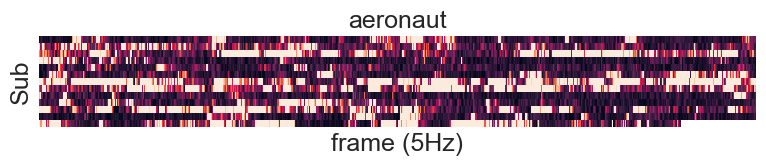

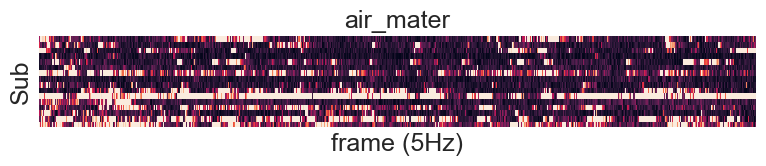

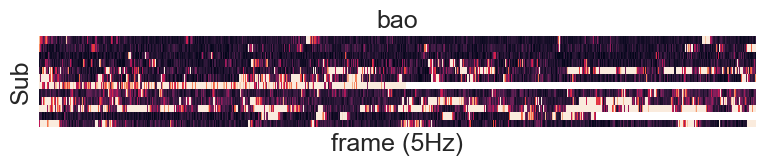

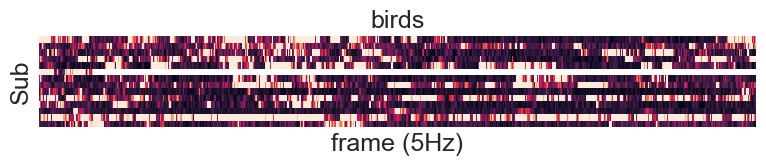

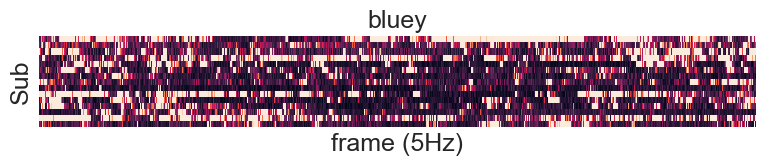

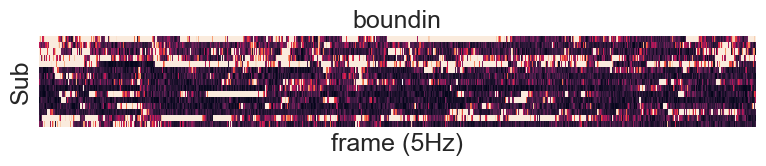

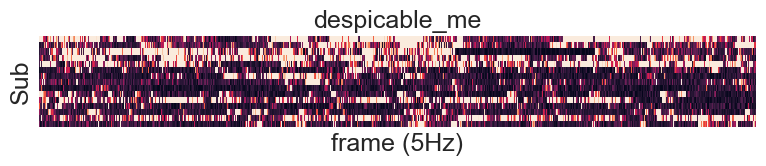

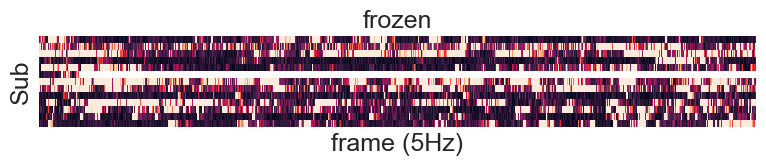

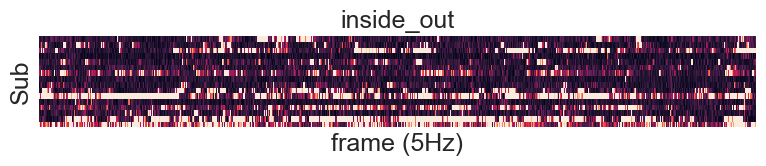

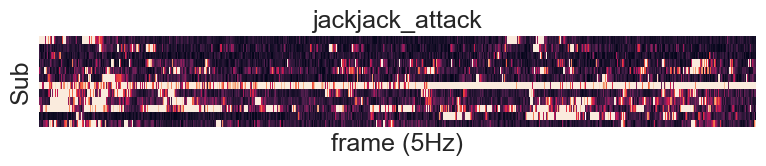

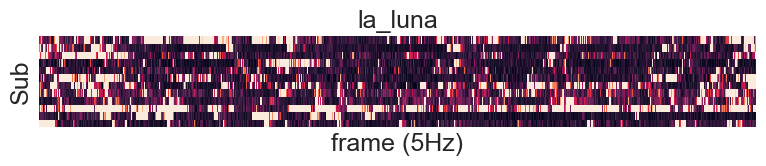

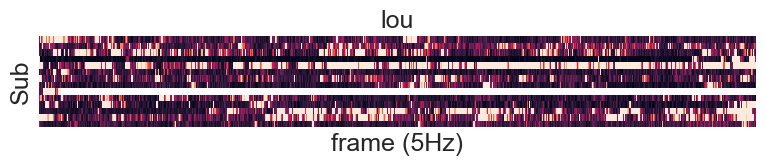

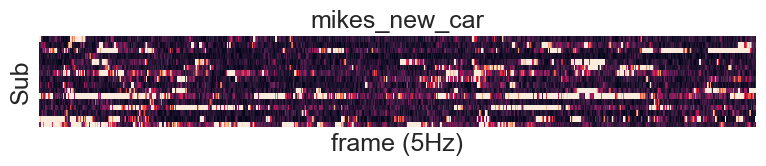

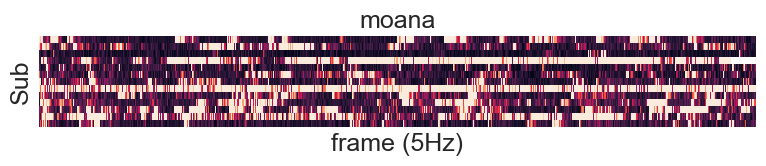

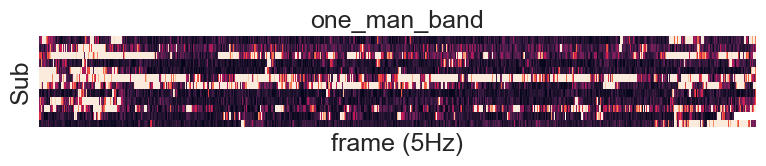

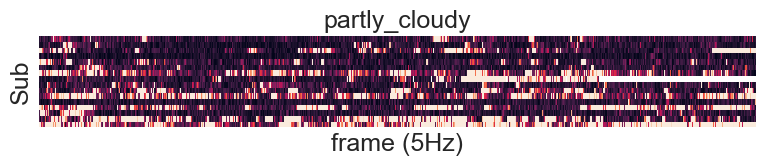

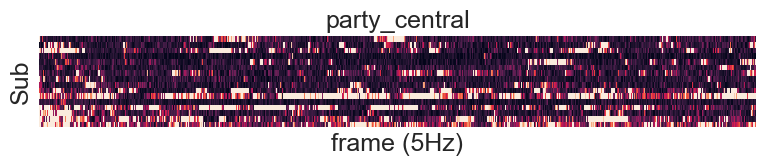

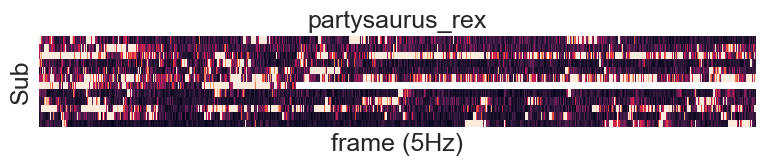

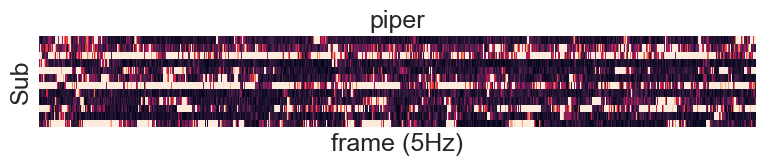

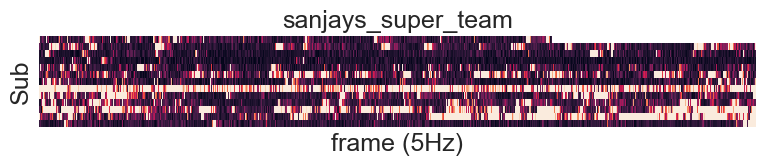

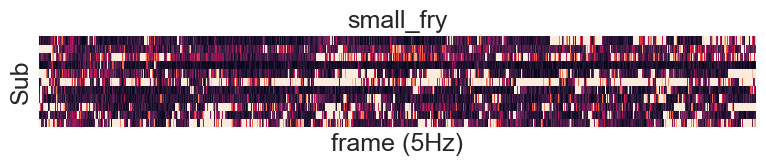

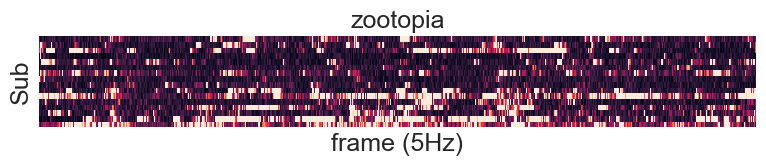

In [71]:
for mov in clipinfo.index:
    plt.figure(figsize=(8,2))
    sns.heatmap(clipmotion[mov].T, vmax=1, cbar=False)   
    plt.xticks([])
    plt.ylabel('Sub')
    plt.xlabel('frame (5Hz)')
    plt.yticks([])
    plt.title(mov)
    
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_clip_{0}_motion_FD_timeplot.png'.format(mov)), dpi=200)
    plt.show()
    plt.close()

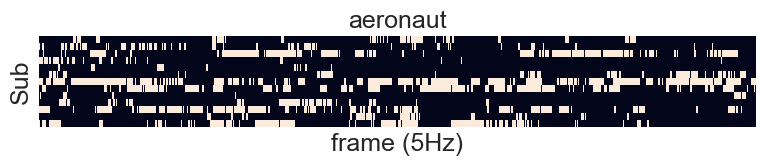

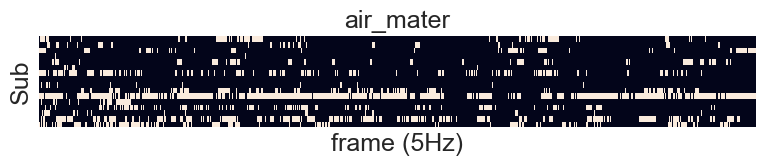

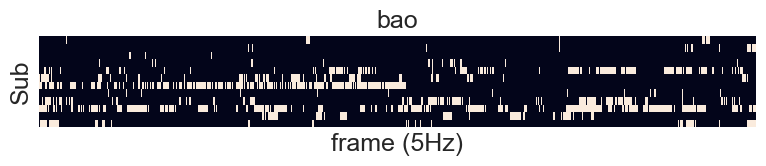

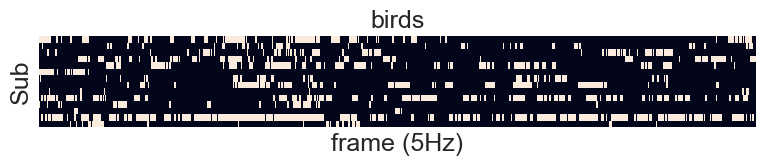

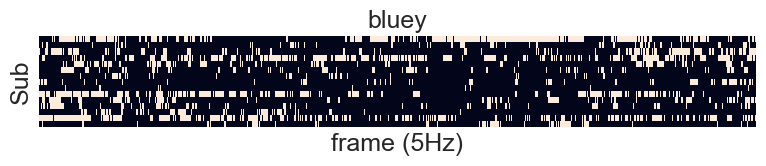

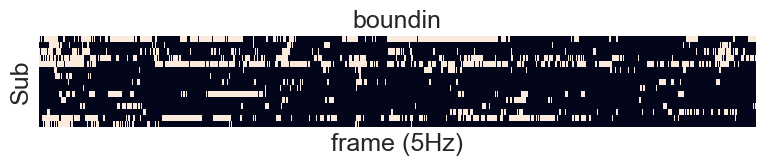

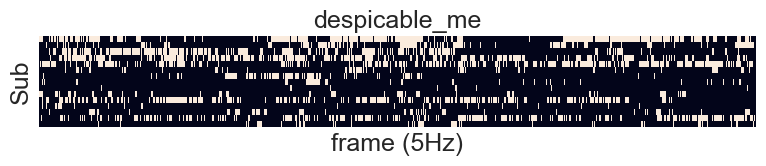

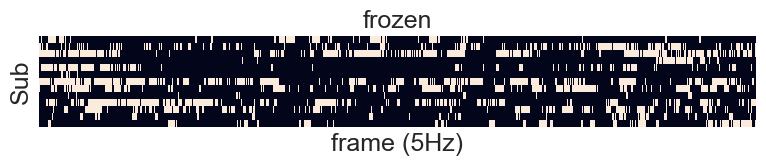

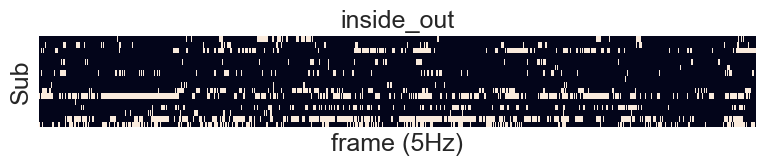

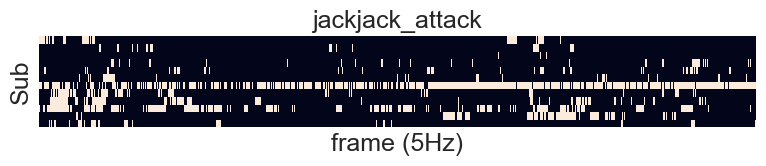

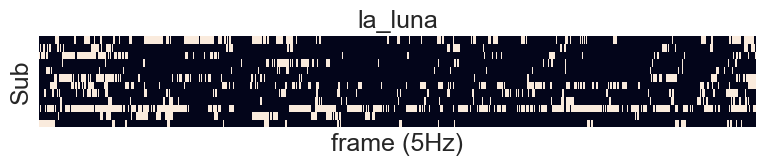

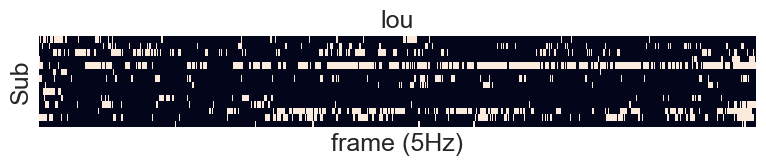

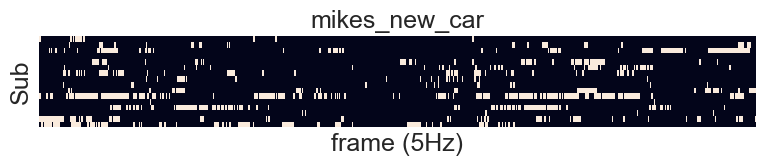

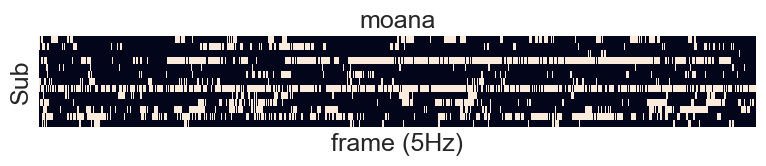

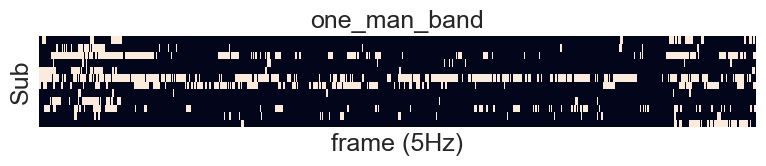

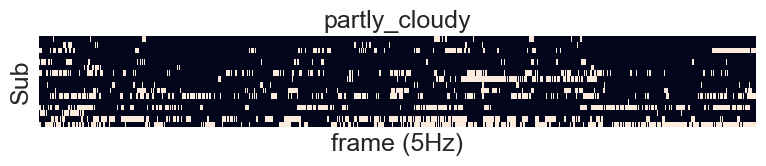

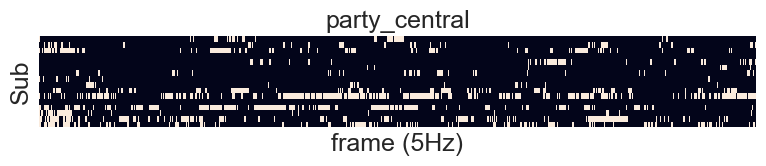

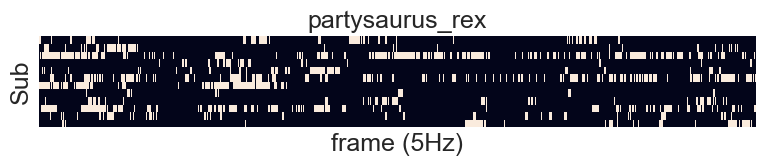

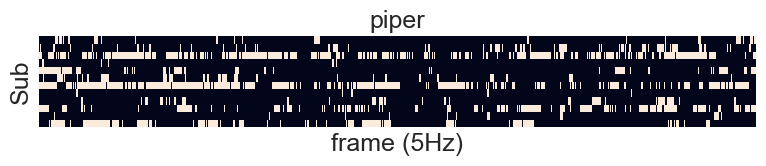

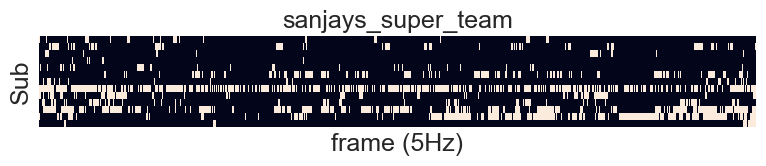

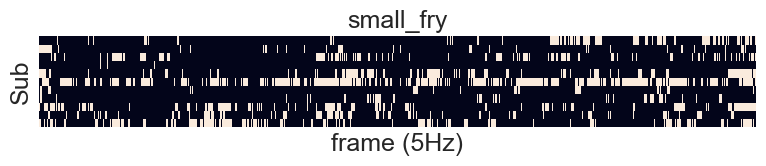

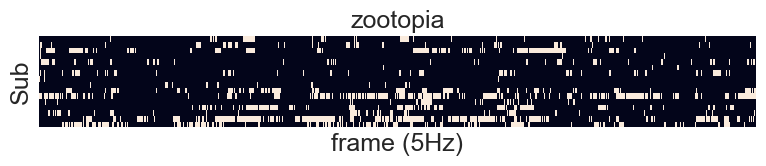

In [25]:
for mov in clipinfo.index:
    plt.figure(figsize=(8,2))
    sns.heatmap(clipmotion[mov].T>0.9, vmax=1, cbar=False)   
    plt.xticks([])
    plt.ylabel('Sub')
    plt.xlabel('frame (5Hz)')
    plt.yticks([])
    plt.title(mov)
    
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_clip_{0}_motion_cens09_timeplot.png'.format(mov)), dpi=200)
    plt.show()
    plt.close()

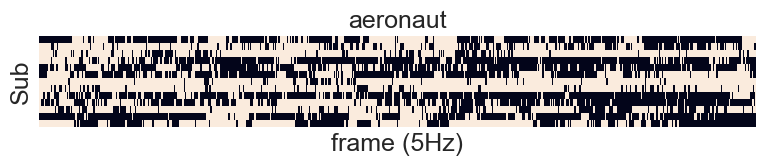

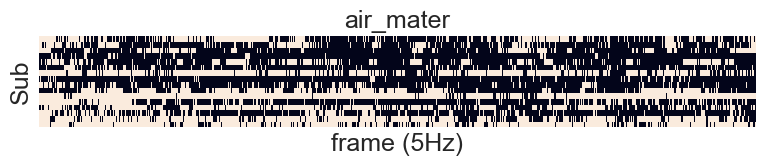

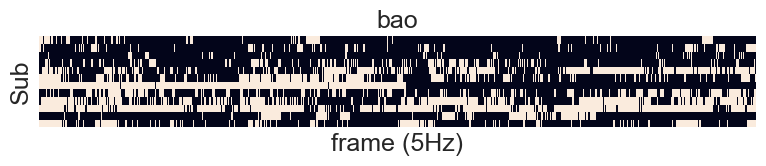

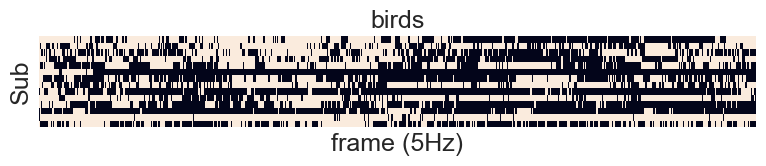

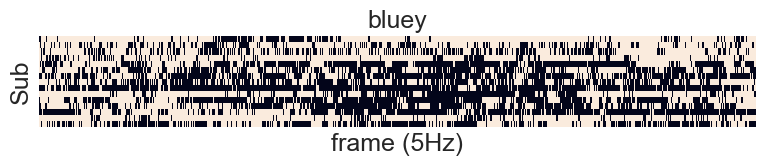

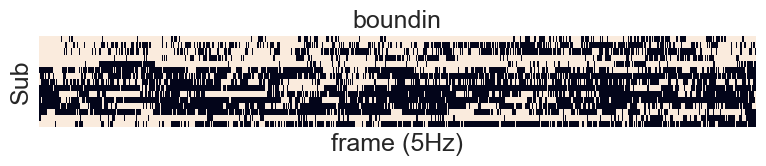

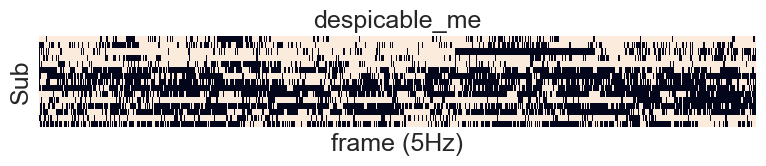

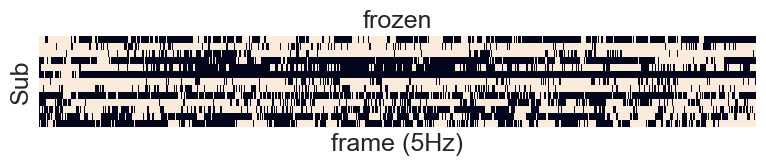

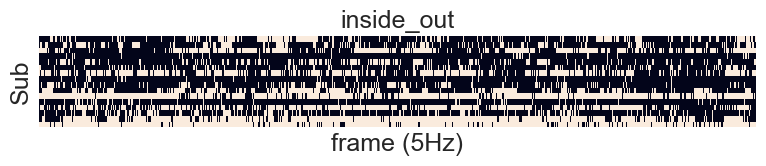

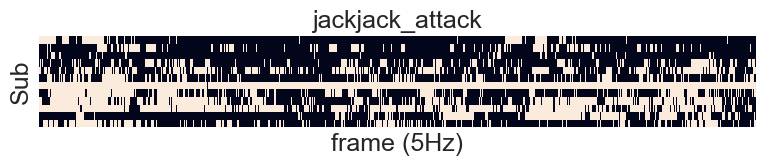

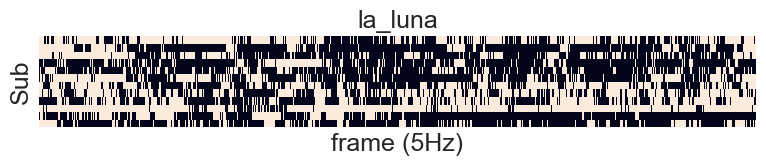

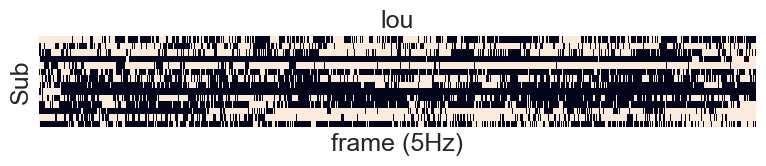

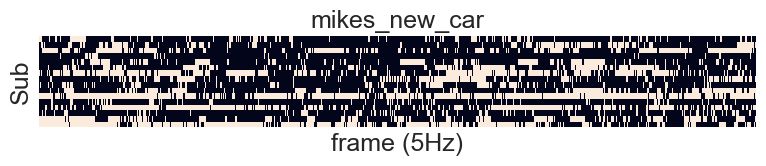

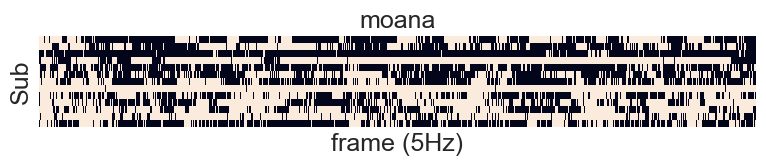

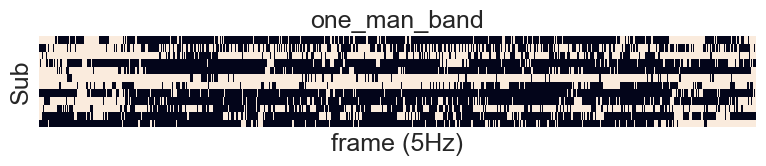

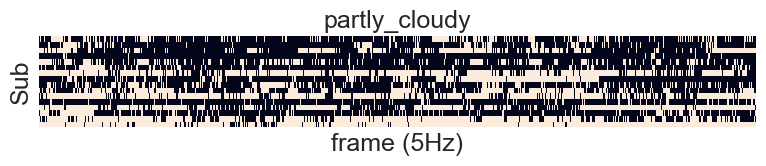

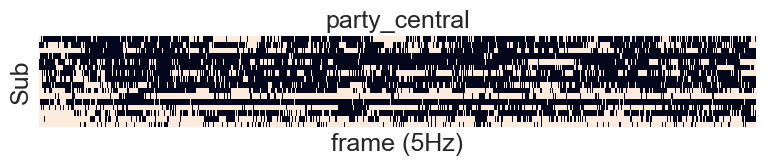

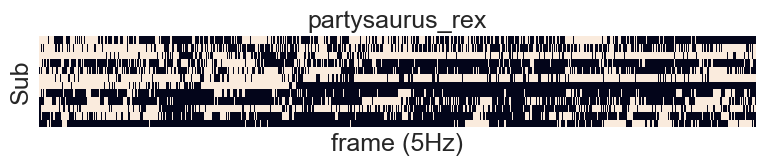

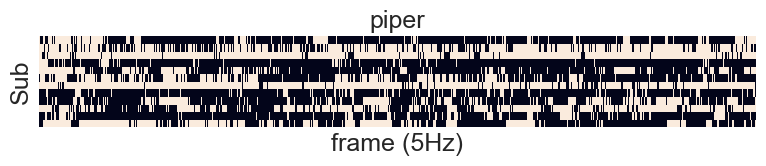

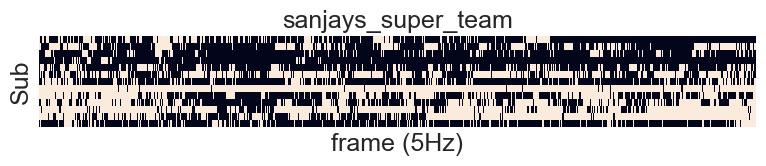

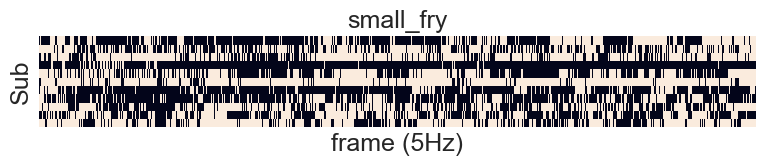

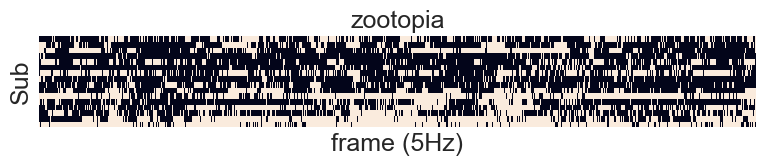

In [26]:
for mov in clipinfo.index:
    plt.figure(figsize=(8,2))
    sns.heatmap(clipmotion[mov].T>0.2, vmax=1, cbar=False)   
    plt.xticks([])
    plt.ylabel('Sub')
    plt.xlabel('frame (5Hz)')
    plt.yticks([])
    plt.title(mov)
    
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_clip_{0}_motion_cens02_timeplot.png'.format(mov)), dpi=200)
    plt.show()
    plt.close()

# examine ratings

In [82]:
means = pd.DataFrame()
for m in np.unique(data.loc[:,'movie']):
    means.loc[m, 'interest'] = data.loc[data['movie']==m,'interest'].mean()
means = means.sort_values('interest',ascending=False)

# t-tests
results = pd.DataFrame()
i=1
m1 = means.index[0]
for a in range(1,len(means.index)):
    m2 = means.index[a]
    t, p = scp.ttest_ind(data.loc[data['movie']==m1,'interest'], 
                         data.loc[data['movie']==m2,'interest'], nan_policy='omit')
    results.loc[i, 'movie1'] = m1
    results.loc[i, 'movie2'] = m2
    results.loc[i, 'movie1_mean'] = means.loc[m1,'interest']
    results.loc[i, 'movie2_mean'] = means.loc[m2,'interest']
    results.loc[i, 't'] = t
    results.loc[i, 'p'] = p
    i += 1
results = results.sort_values('t', ascending=True)
results

movie1              movie2  movie1_mean  movie2_mean         t  \
1   mikes_new_car            aeronaut     2.533333     2.461538  0.138064   
2   mikes_new_car       partly_cloudy     2.533333     2.333333  0.463699   
4   mikes_new_car        one_man_band     2.533333     2.250000  0.517380   
3   mikes_new_car          inside_out     2.533333     2.266667  0.591608   
5   mikes_new_car            zootopia     2.533333     2.230769  0.660110   
6   mikes_new_car       party_central     2.533333     2.200000  0.727118   
9   mikes_new_car               piper     2.533333     2.090909  0.752544   
7   mikes_new_car                 bao     2.533333     2.166667  0.754133   
10  mikes_new_car           small_fry     2.533333     2.090909  0.856466   
12  mikes_new_car               moana     2.533333     2.083333  0.869413   
13  mikes_new_car     partysaurus_rex     2.533333     2.083333  0.889564   
11  mikes_new_car     jackjack_attack     2.533333     2.083333  0.934463   
8   mikes_new_car           air_mater     2.533333     2.133333  0.946994   
14  mikes_new_car              frozen     2.533333     2.000000  1.038754   
15  mikes_new_car  sanjays_super_team     2.533333     1.916667  1.248661   
17  mikes_new_car                 lou     2.533333     1.615385  1.887859   
16  mikes_new_car             la_luna     2.533333     1.636364  1.948409   
18  mikes_new_car               birds     2.533333     1.500000  1.980346   
19  mikes_new_car             boundin     2.533333     1.200000  2.844729   
20  mikes_new_car               bluey     2.533333     1.200000  2.908473   
21  mikes_new_car       despicable_me     2.533333     1.153846  3.034296   

           p  
1   0.891254  
2   0.646448  
4   0.609439  
3   0.558860  
5   0.514989  
6   0.473190  
9   0.459042  
7   0.457815  
10  0.400211  
12  0.392892  
13  0.382180  
11  0.359004  
8   0.351744  
14  0.308483  
15  0.223356  
17  0.070254  
16  0.063151  
18  0.057939  
19  0.008217  
20  0.007036  
21  0.005414

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


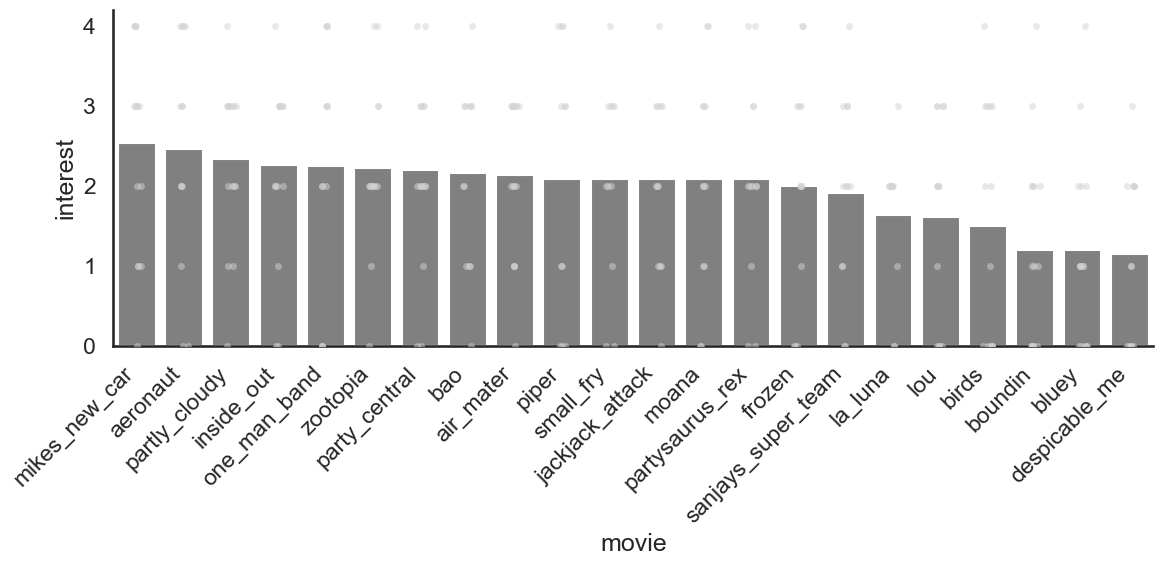

In [81]:
# plot figure 
plt.figure(figsize=(12,6))
sns.barplot(y='interest',x='movie', data=data, color='gray',errwidth=0, order=means.index)
sns.stripplot(y='interest',x='movie', data=data, color='lightgray', alpha=0.5)
plt.xticks(rotation=45, ha='right')
sns.despine()
plt.legend().remove()
plt.tight_layout()
plt.savefig(os.path.join(figs_dir, 'fullsample_clip_affect_interest_plot.png'), dpi=200)
plt.show()
plt.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


           movie1              movie2         t         p
7   despicable_me                 bao  0.734367  0.469558
5   despicable_me        one_man_band  0.726365  0.474362
4   despicable_me  sanjays_super_team  0.526800  0.602799
3   despicable_me     partysaurus_rex  0.425571  0.674062
20  despicable_me       mikes_new_car  0.368223  0.715381
10  despicable_me            zootopia  0.276043  0.784473
17  despicable_me       party_central  0.147064  0.884099
2   despicable_me           small_fry  0.037551  0.970357
12  despicable_me             boundin -0.192779  0.848524
8   despicable_me               bluey -0.232905  0.817530
15  despicable_me           air_mater -0.293380  0.771321
16  despicable_me       partly_cloudy -0.295014  0.770085
6   despicable_me                 lou -0.409474  0.685422
18  despicable_me               birds -0.436788  0.665739
19  despicable_me     jackjack_attack -0.573457  0.571458
21  despicable_me            aeronaut -0.633913  0.531676
13  despicable

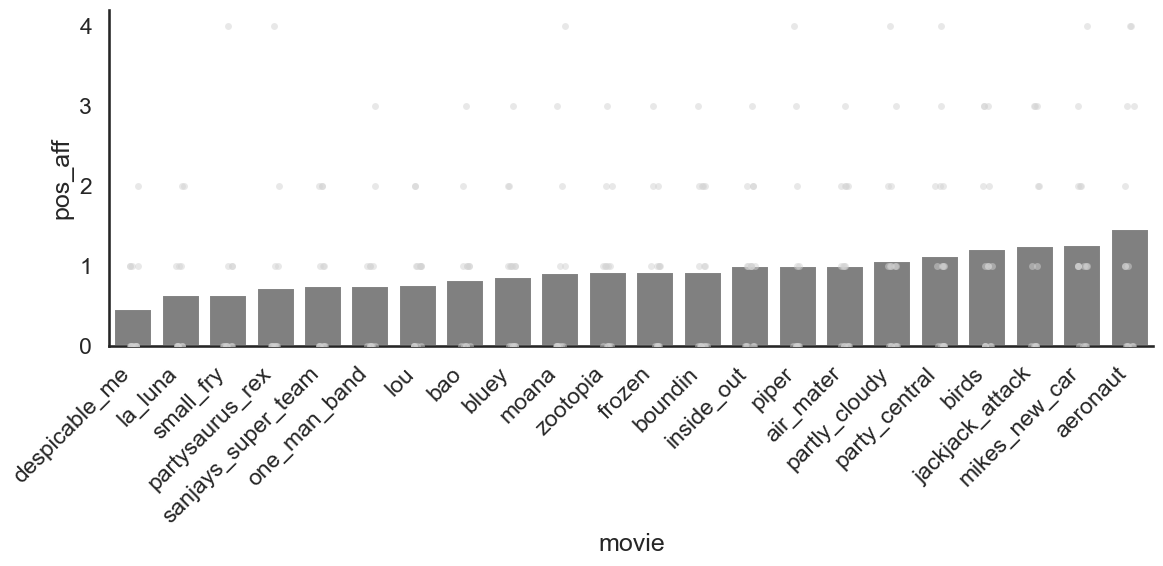

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


           movie1              movie2         t         p
13  mikes_new_car                 bao  0.322765  0.749454
5   mikes_new_car        one_man_band  0.297107  0.768746
12  mikes_new_car  sanjays_super_team  0.112478  0.911277
7   mikes_new_car     partysaurus_rex  0.024937  0.980296
2   mikes_new_car            zootopia -0.099212  0.921630
9   mikes_new_car       party_central -0.263462  0.793996
11  mikes_new_car           small_fry -0.345007  0.732975
18  mikes_new_car       despicable_me -0.368223  0.715381
16  mikes_new_car             boundin -0.489066  0.628474
10  mikes_new_car               bluey -0.585110  0.562999
1   mikes_new_car           air_mater -0.602936  0.551082
3   mikes_new_car       partly_cloudy -0.620352  0.539710
19  mikes_new_car                 lou -0.655059  0.517775
4   mikes_new_car               birds -0.739583  0.465709
8   mikes_new_car     jackjack_attack -0.808794  0.425973
14  mikes_new_car          inside_out -1.000682  0.324984
6   mikes_new_

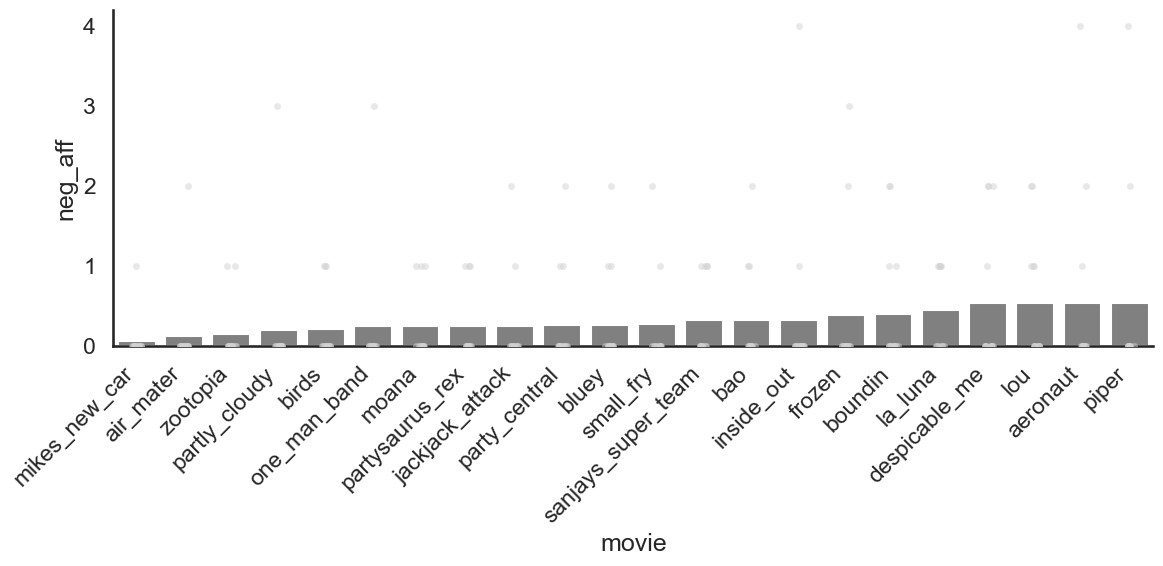

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


       movie1              movie2         t         p
6   small_fry        one_man_band  0.940346  0.357732
5   small_fry                 bao  0.899839  0.378409
7   small_fry  sanjays_super_team  0.598172  0.555834
8   small_fry     partysaurus_rex  0.477036  0.638263
13  small_fry       mikes_new_car  0.345007  0.732975
2   small_fry            zootopia  0.250142  0.804521
16  small_fry       party_central  0.117154  0.907674
1   small_fry       despicable_me -0.037551  0.970357
19  small_fry             boundin -0.211594  0.834210
4   small_fry               bluey -0.270787  0.788870
12  small_fry           air_mater -0.309156  0.759765
18  small_fry       partly_cloudy -0.316866  0.753977
11  small_fry                 lou -0.397456  0.694696
17  small_fry               birds -0.449320  0.657406
14  small_fry     jackjack_attack -0.547496  0.589810
15  small_fry          inside_out -0.681920  0.501559
9   small_fry               moana -0.733151  0.471207
21  small_fry            aer

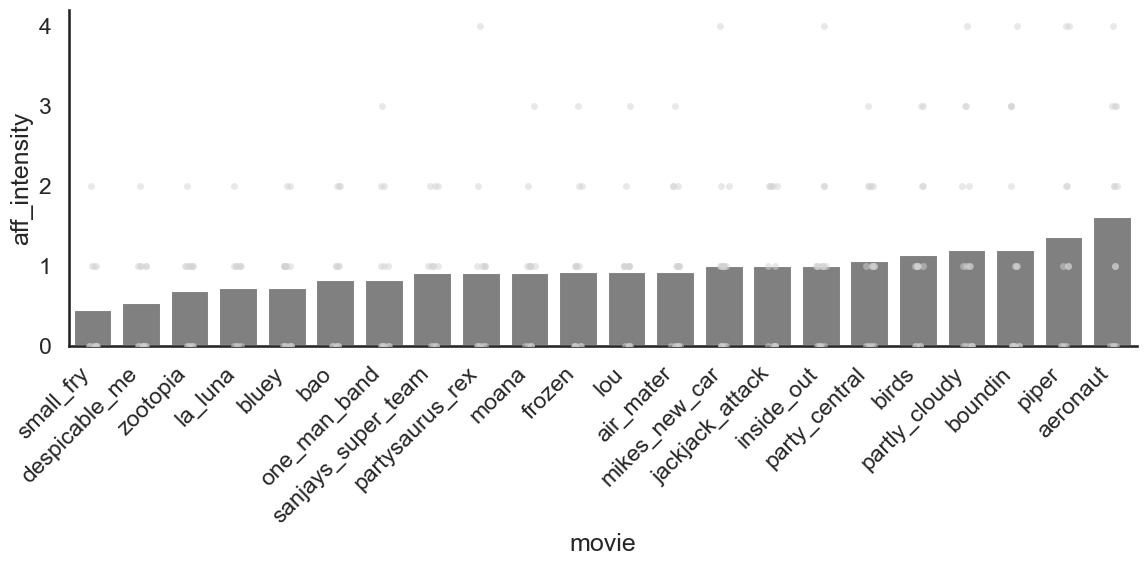

In [83]:
for v in ['pos_aff', 'neg_aff','aff_intensity']:

    means = pd.DataFrame()
    for m in np.unique(data.loc[:,'movie']):
        means.loc[m, v] = data.loc[data['movie']==m,v].mean()
    means = means.sort_values(v,ascending=True)

    # t-tests
    results = pd.DataFrame()
    i=1
    m1 = means.index[0]
    for a in range(1,len(means.index)):
        m2 = means.index[a]
        t, p = scp.ttest_ind(data.loc[data['movie']==m1,'meanFD_res'], 
                             data.loc[data['movie']==m2,'meanFD_res'])
        results.loc[i, 'movie1'] = m1
        results.loc[i, 'movie2'] = m2
        results.loc[i, 't'] = t
        results.loc[i, 'p'] = p
        i += 1
    results = results.sort_values('t', ascending=False)
    print(results)

    # plot figure 
    plt.figure(figsize=(12,6))
    sns.barplot(y=v,x='movie', data=data, color='gray',errwidth=0, order=means.index)
    sns.stripplot(y=v,x='movie', data=data, color='lightgray', alpha=0.5)
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_clip_affect_{0}_plot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 800x600 with 0 Axes>

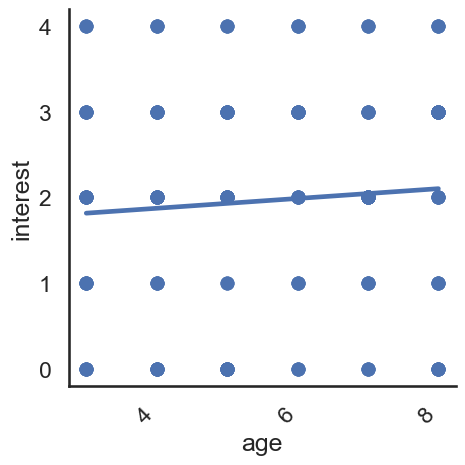

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 800x600 with 0 Axes>

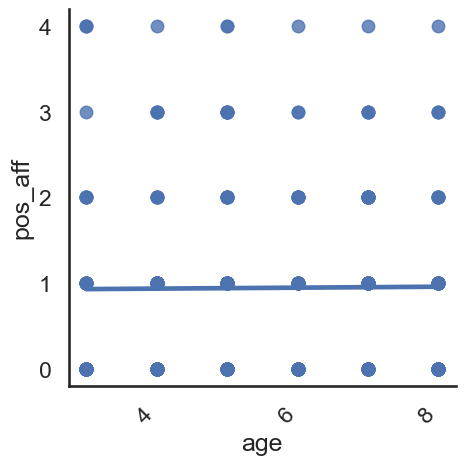

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 800x600 with 0 Axes>

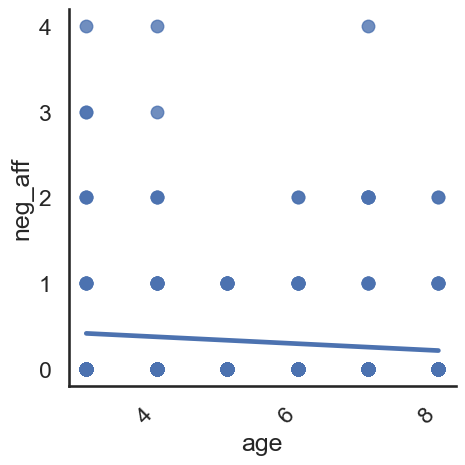

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 800x600 with 0 Axes>

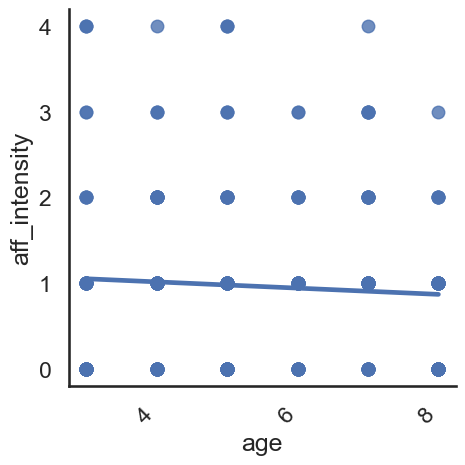

In [84]:
for v in ['interest', 'pos_aff', 'neg_aff','aff_intensity']:
    
    plt.figure(figsize=(8,6))
    sns.lmplot(y=v,x='age', data=data, scatter=True, ci=None)
    #sns.stripplot(y=v,x='age', data=data, hue='sub')
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig(os.path.join(figs_dir, 'fullsample_age_affect_{0}_lineplot.png'.format(v)), dpi=200)
    plt.show()
    plt.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



################### interest - human ###################

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: interest 
No. Observations: 288     Method:             REML     
No. Groups:       55      Scale:              0.7490   
Min. group size:  2       Log-Likelihood:     -424.8780
Max. group size:  6       Converged:          Yes      
Mean group size:  5.2                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.771    0.520  3.409 0.001  0.753  2.789
human         0.028    0.125  0.228 0.820 -0.216  0.272
age           0.038    0.084  0.458 0.647 -0.126  0.203
sex          -0.108    0.285 -0.378 0.705 -0.666  0.451
sub Var       0.960    0.278                           



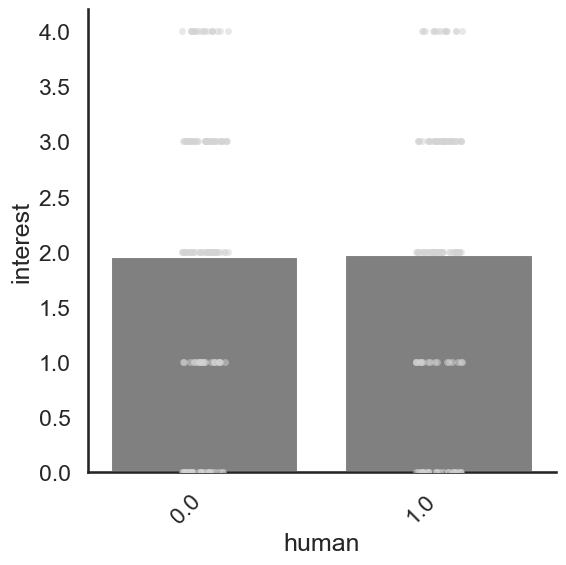


################### interest - speaking ###################



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: interest 
No. Observations: 288     Method:             REML     
No. Groups:       55      Scale:              0.7447   
Min. group size:  2       Log-Likelihood:     -424.3800
Max. group size:  6       Converged:          Yes      
Mean group size:  5.2                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.866    0.522  3.574 0.000  0.843  2.890
speaking     -0.125    0.110 -1.138 0.255 -0.341  0.090
age           0.037    0.084  0.444 0.657 -0.127  0.202
sex          -0.107    0.285 -0.375 0.707 -0.666  0.452
sub Var       0.963    0.279                           



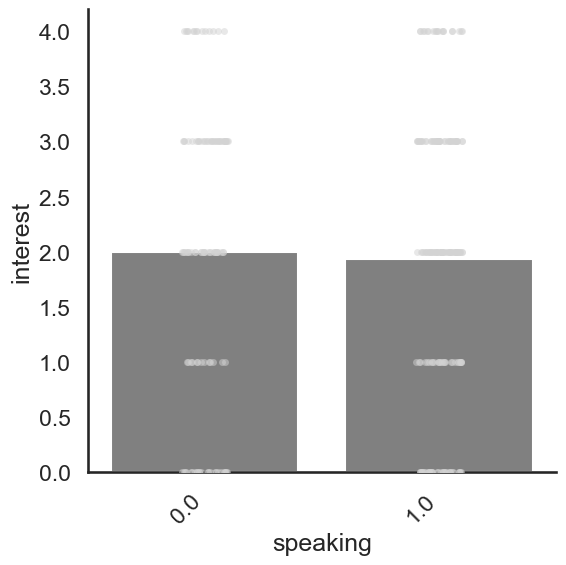


################### interest - contained ###################

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: interest 
No. Observations: 288     Method:             REML     
No. Groups:       55      Scale:              0.7465   
Min. group size:  2       Log-Likelihood:     -424.5984
Max. group size:  6       Converged:          Yes      
Mean group size:  5.2                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     1.715    0.525  3.267 0.001  0.686  2.743
contained     0.098    0.123  0.797 0.425 -0.143  0.339
age           0.038    0.084  0.449 0.654 -0.127  0.203
sex          -0.111    0.285 -0.389 0.698 -0.670  0.449
sub Var       0.965    0.280                           



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


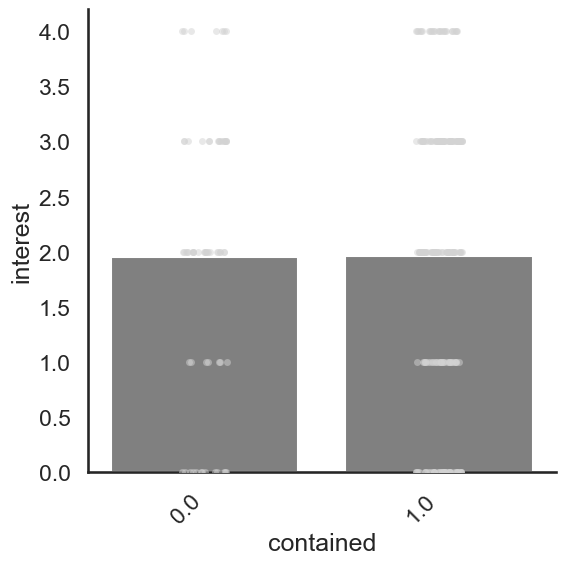


################### pos_aff - human ###################

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pos_aff  
No. Observations: 288     Method:             REML     
No. Groups:       55      Scale:              0.7766   
Min. group size:  2       Log-Likelihood:     -412.6699
Max. group size:  6       Converged:          Yes      
Mean group size:  5.2                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.906    0.380  2.387 0.017  0.162  1.650
human        -0.125    0.122 -1.021 0.307 -0.365  0.115
age           0.013    0.061  0.220 0.826 -0.106  0.133
sex           0.100    0.208  0.480 0.632 -0.307  0.506
sub Var       0.435    0.149                           



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


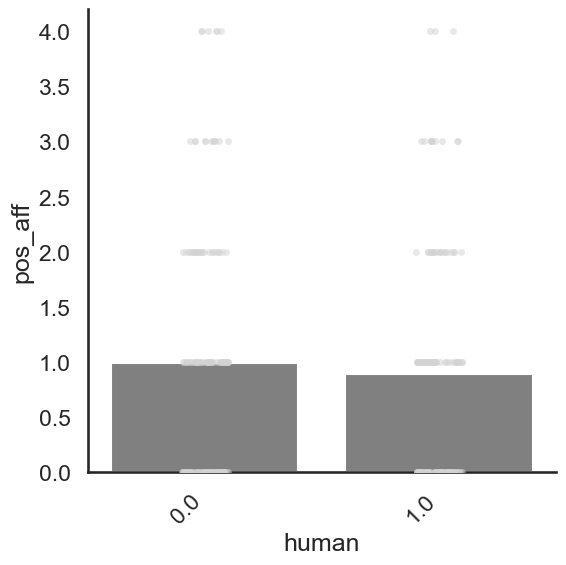


################### pos_aff - speaking ###################

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pos_aff  
No. Observations: 288     Method:             REML     
No. Groups:       55      Scale:              0.7800   
Min. group size:  2       Log-Likelihood:     -413.1712
Max. group size:  6       Converged:          Yes      
Mean group size:  5.2                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.886    0.382  2.318 0.020  0.137  1.635
speaking     -0.053    0.112 -0.474 0.635 -0.272  0.166
age           0.011    0.061  0.187 0.852 -0.108  0.131
sex           0.103    0.207  0.495 0.620 -0.303  0.509
sub Var       0.432    0.148                           



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


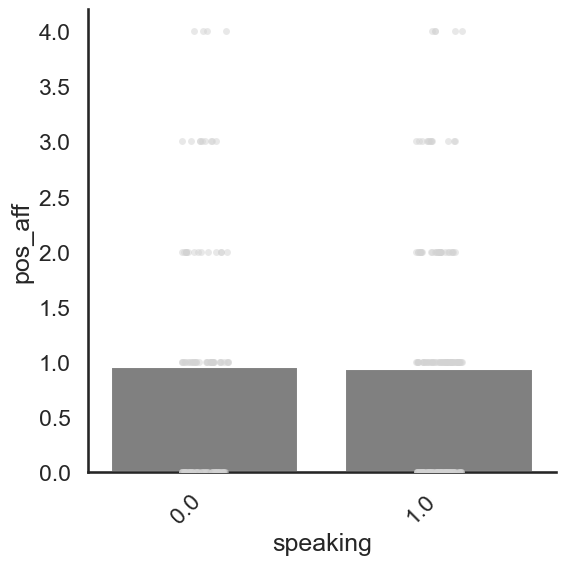


################### pos_aff - contained ###################



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: pos_aff  
No. Observations: 288     Method:             REML     
No. Groups:       55      Scale:              0.7754   
Min. group size:  2       Log-Likelihood:     -412.4465
Max. group size:  6       Converged:          Yes      
Mean group size:  5.2                                  
--------------------------------------------------------
           Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  0.745     0.386  1.930  0.054  -0.012   1.501
contained  0.150     0.125  1.203  0.229  -0.095   0.395
age        0.011     0.061  0.172  0.863  -0.109   0.130
sex        0.099     0.207  0.476  0.634  -0.308   0.505
sub Var    0.435     0.149                              



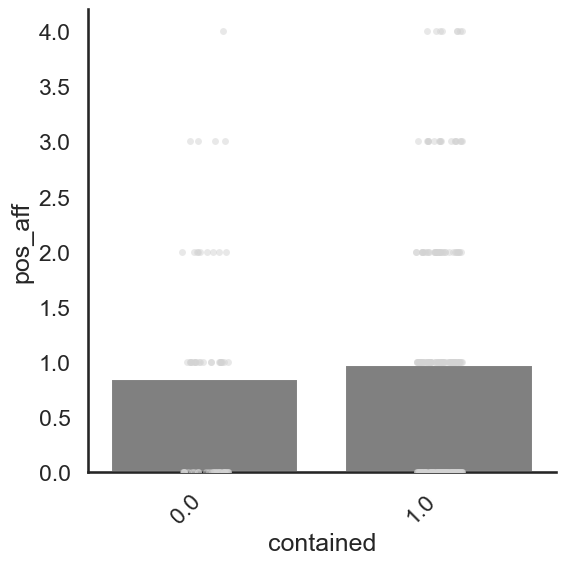


################### neg_aff - human ###################



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: neg_aff  
No. Observations: 288     Method:             REML     
No. Groups:       55      Scale:              0.3307   
Min. group size:  2       Log-Likelihood:     -291.0089
Max. group size:  6       Converged:          Yes      
Mean group size:  5.2                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.409    0.246  1.665 0.096 -0.072  0.891
human         0.161    0.080  2.013 0.044  0.004  0.317
age          -0.037    0.040 -0.927 0.354 -0.114  0.041
sex           0.043    0.134  0.321 0.748 -0.220  0.306
sub Var       0.181    0.091                           



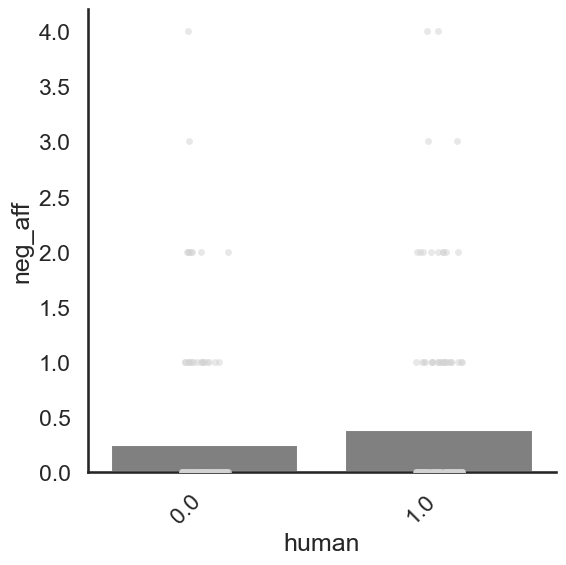


################### neg_aff - speaking ###################

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: neg_aff  
No. Observations: 288     Method:             REML     
No. Groups:       55      Scale:              0.3352   
Min. group size:  2       Log-Likelihood:     -292.5060
Max. group size:  6       Converged:          Yes      
Mean group size:  5.2                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.533    0.247  2.155 0.031  0.048  1.018
speaking     -0.081    0.073 -1.102 0.270 -0.224  0.063
age          -0.036    0.039 -0.907 0.365 -0.113  0.041
sex           0.041    0.134  0.303 0.762 -0.222  0.303
sub Var       0.179    0.090                           



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


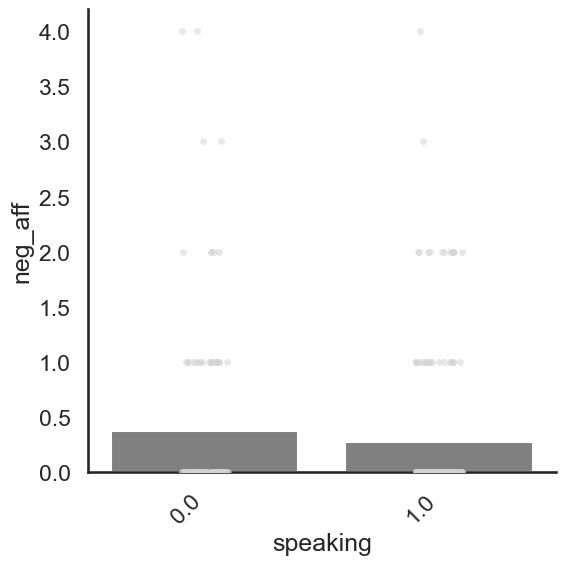


################### neg_aff - contained ###################

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: neg_aff  
No. Observations: 288     Method:             REML     
No. Groups:       55      Scale:              0.3357   
Min. group size:  2       Log-Likelihood:     -292.8003
Max. group size:  6       Converged:          Yes      
Mean group size:  5.2                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.516    0.250  2.061 0.039  0.025  1.007
contained    -0.052    0.082 -0.627 0.531 -0.213  0.110
age          -0.034    0.040 -0.867 0.386 -0.112  0.043
sex           0.041    0.134  0.304 0.761 -0.223  0.304
sub Var       0.181    0.091                           



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


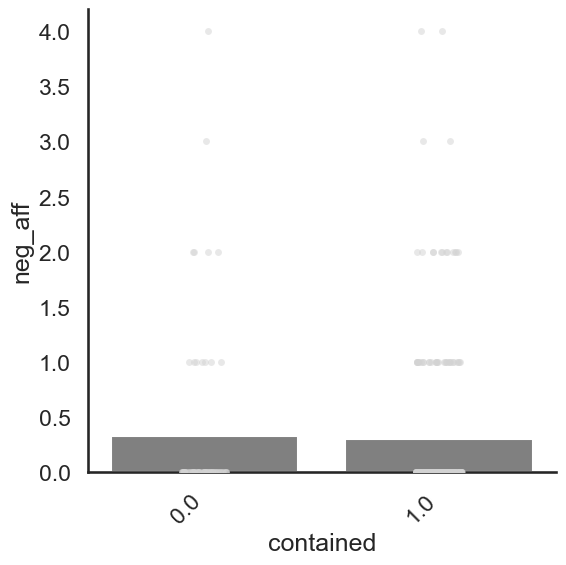


################### aff_intensity - human ###################

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: aff_intensity
No. Observations: 288     Method:             REML         
No. Groups:       55      Scale:              0.5873       
Min. group size:  2       Log-Likelihood:     -379.5854    
Max. group size:  6       Converged:          Yes          
Mean group size:  5.2                                      
------------------------------------------------------------
             Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept     1.071     0.374   2.859  0.004   0.337   1.804
human        -0.052     0.108  -0.477  0.634  -0.263   0.160
age          -0.028     0.060  -0.456  0.649  -0.146   0.091
sex           0.173     0.205   0.842  0.400  -0.229   0.575
sub Var       0.458     0.163                               



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


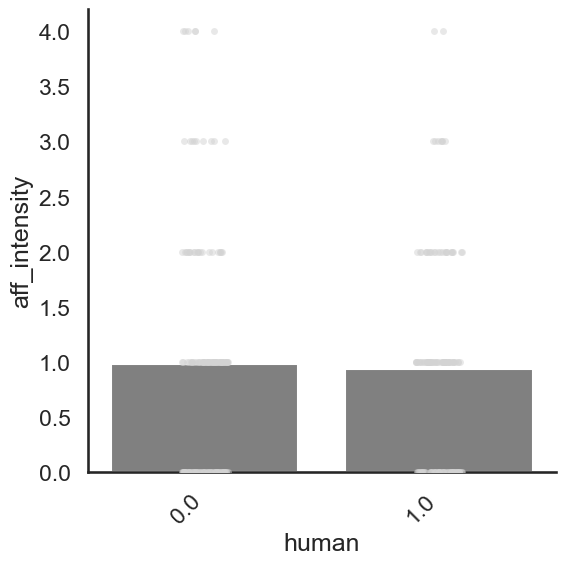


################### aff_intensity - speaking ###################

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: aff_intensity
No. Observations: 288     Method:             REML         
No. Groups:       55      Scale:              0.5745       
Min. group size:  2       Log-Likelihood:     -377.2352    
Max. group size:  6       Converged:          Yes          
Mean group size:  5.2                                      
------------------------------------------------------------
             Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept     1.193     0.377   3.160  0.002   0.453   1.933
speaking     -0.219     0.096  -2.281  0.023  -0.408  -0.031
age          -0.031     0.060  -0.505  0.614  -0.149   0.088
sex           0.176     0.205   0.859  0.390  -0.226   0.579
sub Var       0.462     0.166                               



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


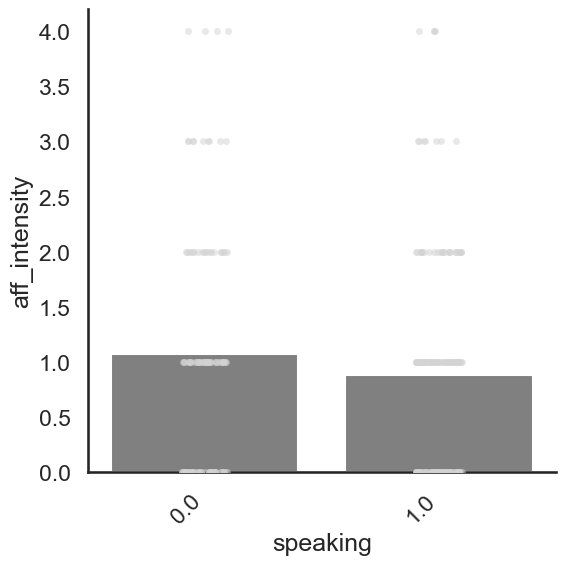


################### aff_intensity - contained ###################

           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: aff_intensity
No. Observations: 288     Method:             REML         
No. Groups:       55      Scale:              0.5801       
Min. group size:  2       Log-Likelihood:     -378.1209    
Max. group size:  6       Converged:          Yes          
Mean group size:  5.2                                      
------------------------------------------------------------
             Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
------------------------------------------------------------
Intercept     0.912     0.379   2.405  0.016   0.169   1.655
contained     0.192     0.108   1.779  0.075  -0.020   0.405
age          -0.030     0.060  -0.497  0.619  -0.148   0.088
sex           0.170     0.205   0.828  0.408  -0.232   0.571
sub Var       0.459     0.164                               



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


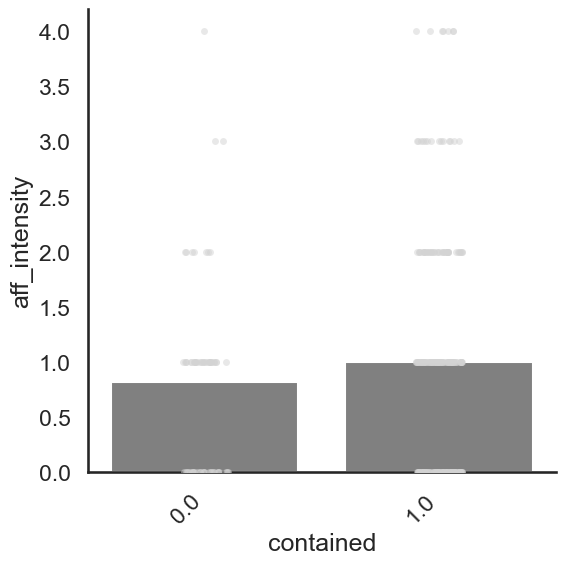

In [85]:
for v in ['interest', 'pos_aff', 'neg_aff','aff_intensity']:
    for f in ['human','speaking','contained']:

        print('')
        print('################### {0} - {1} ###################'.format(v, f))
        print('')

        temp = data.dropna().copy()
        res = smf.mixedlm('{0} ~ {1} + age + sex'.format(v,f), groups='sub', data=temp).fit()
        print(res.summary())
        
        plt.figure(figsize=(6,6))
        sns.barplot(y=v,x=f, data=data, color='gray', errwidth=0)
        sns.stripplot(y=v,x=f, data=data, color='lightgray', alpha=0.5)
        plt.xticks(rotation=45, ha='right')
        sns.despine()
        plt.legend().remove()
        plt.tight_layout()
        plt.savefig(os.path.join(figs_dir, 'fullsample_feature_{0}_affect_{1}_plot.png'.format(f,v)), dpi=200)
        plt.show()
        plt.close()